In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# 1.血肿扩张风险相关因素探索建模
## a 判断48h内血肿扩张事件
1. 判断是否发生血肿扩张(1/0)
2. 记录血肿扩张发生时间(10.33(h))

In [33]:
file_path = '../E题/数据/表1-患者列表及临床信息.xlsx'
table1 = pd.read_excel(file_path)
table1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     160 non-null    object 
 1   90天mRS         100 non-null    float64
 2   数据集划分          160 non-null    object 
 3   入院首次影像检查流水号    160 non-null    int64  
 4   年龄             160 non-null    int64  
 5   性别             160 non-null    object 
 6   脑出血前mRS评分      160 non-null    int64  
 7   高血压病史          160 non-null    int64  
 8   卒中病史           160 non-null    int64  
 9   糖尿病史           160 non-null    int64  
 10  房颤史            160 non-null    int64  
 11  冠心病史           160 non-null    int64  
 12  吸烟史            160 non-null    int64  
 13  饮酒史            160 non-null    int64  
 14  发病到首次影像检查时间间隔  160 non-null    float64
 15  血压             160 non-null    object 
 16  脑室引流           160 non-null    int64  
 17  止血治疗           160 non-null    int64  
 18  降颅压治疗     

In [34]:
# 从table_1选择两列
table_1_issue1 = table_1[['入院首次影像检查流水号', '发病到首次影像检查时间间隔']]

# 将时间间隔转换为时间间隔类型
table_1_issue1['发病到首次影像检查时间间隔'] = pd.to_timedelta(table_1_issue1['发病到首次影像检查时间间隔'], unit='h')
table_1_issue1.head()

c:\Users\MrFeng\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,入院首次影像检查流水号,发病到首次影像检查时间间隔
0,20161212002136,0 days 02:30:00
1,20160406002131,0 days 03:00:00
2,20160413000006,0 days 02:00:00
3,20161215001667,0 days 01:00:00
4,20161222000978,0 days 05:00:00


In [35]:
# 统计空值的个数
null_count = table_1_issue1.isnull().sum()

# 打印空值的个数
print('Null count:')
print(null_count)

# 找到包含空值的列
null_columns = null_count[null_count > 0].index

# 打印包含空值的列
print('Null columns:')
print(null_columns)

Null count:
入院首次影像检查流水号      0
发病到首次影像检查时间间隔    0
dtype: int64
Null columns:
Index([], dtype='object')


In [36]:
file_path = '../E题/数据/表2-患者影像信息血肿及水肿的体积及位置.xlsx'
table_2 = pd.read_excel(file_path)
table_2.head()

,ID,首次检查流水号,HM_volume,HM_ACA_R_Ratio,HM_MCA_R_Ratio,HM_PCA_R_Ratio,HM_Pons_Medulla_R_Ratio,HM_Cerebellum_R_Ratio,HM_ACA_L_Ratio,HM_MCA_L_Ratio,...,ED_ACA_R_Ratio.8,ED_MCA_R_Ratio.8,ED_PCA_R_Ratio.8,ED_Pons_Medulla_R_Ratio.8,ED_Cerebellum_R_Ratio.8,ED_ACA_L_Ratio.8,ED_MCA_L_Ratio.8,ED_PCA_L_Ratio.8,ED_Pons_Medulla_L_Ratio.8,ED_Cerebellum_L_Ratio.8
0,sub001,20161212002136,69714,0.000258,0.877112,0.120148,0.000000,0.0,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,sub002,20160406002131,47500,0.496000,0.180779,0.302316,0.000000,0.0,0.003032,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,sub003,20160413000006,86396,0.053718,0.829078,0.099681,0.000197,0.0,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,sub004,20161215001667,45498,0.002242,0.002198,0.029100,0.000374,0.0,0.163458,0.313618,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,sub005,20161222000978,14832,0.000000,0.000000,0.001146,0.000337,0.0,0.000202,0.413363,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
schedule_1 = pd.read_excel('../E题/数据/附表1-检索表格-流水号vs时间.xlsx')

schedule_1.head()

,ID,重复次数,入院首次检查时间点,入院首次检查流水号,随访1时间点,随访1流水号,随访2时间点,随访2流水号,随访3时间点,随访3流水号,...,Unnamed: 98,Unnamed: 99,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,Unnamed: 107
0,Hemo0001,5,2016-12-12 23:32:54,20161212002136,2016-12-13 05:19:00,2.016121e+13,2016-12-18 09:09:24,2.016122e+13,2016-12-23 16:47:09,2.016122e+13,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Hemo0002,5,2016-04-06 21:21:03,20160406002131,2016-04-07 09:16:27,2.016041e+13,2016-04-09 15:34:22,2.016041e+13,2016-04-25 10:22:02,2.016043e+13,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Hemo0004,3,2016-04-13 01:18:17,20160413000006,2016-04-13 08:49:38,2.016041e+13,2016-04-14 14:54:02,2.016041e+13,NaT,NaN,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Hemo0006,4,2016-12-15 22:53:41,20161215001667,2016-12-16 14:52:08,2.016122e+13,2016-12-19 09:44:24,2.016122e+13,2016-12-25 09:23:45,2.016123e+13,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Hemo0012,3,2016-12-22 13:18:48,20161222000978,2016-12-23 10:46:51,2.016122e+13,2016-12-26 10:15:23,2.016123e+13,NaT,NaN,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
# 筛选table2的列
index = ['首次检查流水号', '随访1流水号', '随访2流水号', '随访3流水号', '随访4流水号', '随访5流水号']
index_list = []
for i in index:
    index_list.append(table_2.columns.get_loc(i))
    index_list.append(table_2.columns.get_loc(i) + 1)
table_2_issue1 = table_2.iloc[: , index_list]
table_2_issue1.head()

,首次检查流水号,HM_volume,随访1流水号,HM_volume.1,随访2流水号,HM_volume.2,随访3流水号,HM_volume.3,随访4流水号,HM_volume.4,随访5流水号,HM_volume.5
0,20161212002136,69714,2.016121e+13,74902.0,2.016122e+13,70952.0,2.016122e+13,62831.0,2.016123e+13,44029.0,NaN,NaN
1,20160406002131,47500,2.016041e+13,52271.0,2.016041e+13,47748.0,2.016043e+13,13055.0,2.016052e+13,20.0,NaN,NaN
2,20160413000006,86396,2.016041e+13,106042.0,2.016041e+13,103263.0,NaN,NaN,NaN,NaN,NaN,NaN
3,20161215001667,45498,2.016122e+13,39877.0,2.016122e+13,16622.0,2.016123e+13,8441.0,NaN,NaN,NaN,NaN
4,20161222000978,14832,2.016122e+13,24472.0,2.016123e+13,25477.0,NaN,NaN,NaN,NaN,NaN,NaN


### a.1 判断48h内是否发生血肿
血肿判断方法  
$后续检查体积 - 首次检查体积 \geq 6mL$ 或
$\frac{后续检查 - 首次检查}{首次检查} \geq 33% $

In [39]:
from datetime import timedelta
# 判断血肿体积变化
result, time_list = [0 for _ in range(160)], ['0小时' for _ in range(160)]
latest_index = 0
for index, row in table_2_issue1.iterrows():
    for num in range(1, 6):
        latest_index = 2 * num + 1
        # 先判断是否发生血肿
        if row[latest_index] - row[1] >= 6000 or (row[latest_index] - row[1]) / row[1] > 0.33:
            # 再判断发生血肿是否在48h内
            # 计算率先达到血肿条件的时间戳索引，判断这段时间是否超出48h
            row_index, col_index = np.where(schedule_1.values == row[latest_index-1])
            # 如果血肿在48h内
            if schedule_1.iloc[row_index, col_index-1].values[0] != None and pd.Timedelta(days=2) >= schedule_1.iloc[row_index, col_index-1].values[0][0] + table_1_issue1.iloc[index]['发病到首次影像检查时间间隔'] - schedule_1.iloc[row_index, 2].values[0]:
                interval_time = schedule_1.iloc[row_index, col_index-1].values[0][0] - schedule_1.iloc[row_index, 2].values[0]
                interval_time = timedelta(microseconds=int(interval_time / np.timedelta64(1, 'us')))
                result[index] = 1
                time_list[index] = f'{interval_time.total_seconds() / 3600:.4f}小时'
                # print(index, num, result[index], time_list[index])
                break
print(result)
print(time_list)

[0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1]
['0小时', '0小时', '7.5225小时', '0小时', '21.4675小时', '0小时', '0小时', '0小时', '39.3861小时', '0小时', '0小时', '0小时', '0小时', '0小时', '0小时', '0小时', '12.8703小时', '0小时', '0小时', '0小时', '0小时', '0小时', '0小时', '0小时', '0小时', '0小时', '0小时', '0小时', '0小时', '0小时', '0小时', '0小时', '24.8131小时', '0小时', '0小时', '36.5011小时', '0小时', '14.8092小时', '27.1761小时', '0小时', '0小时', '0小时', '0小时', '0小时', '0小时', '0小时', '0小时', '11.8608小时', '0小时', '0小时', '0小时', '0小时', '0小时', '15.2250小时', '0小时', '0小时', '14.3658小时', '0小时', '0小时', '23.2261小时', '6.0417小时', '0小时', '0小时', '

In [40]:
from openpyxl import load_workbook

# 打开答案文件.xlsx
workbook = load_workbook('../E题/数据/表4-答案文件.xlsx')

# 选择活动的工作表
worksheet = workbook.active

# 获取起始单元格的列号和行号
result_start_column = 'C'
start_row = 4
time_start_column = 'D'

# 逐行写入result列表的元素
for i in range(len(result)):
    # 定位
    result_current_column = result_start_column
    time_current_column = time_start_column
    result_cell_coordinate = f"{result_current_column}{start_row + i}"
    time_cell_coordinate = f"{time_current_column}{start_row + i}"
    # 写入
    worksheet[result_cell_coordinate] = result[i]
    worksheet[time_cell_coordinate] = time_list[i]

# 保存工作簿到文件
workbook.save('../E题/数据/表4-答案文件.xlsx')

### a.2 记录血肿发生时间

血肿发生时间(h) = 最近一次的时间 - 首次时间 + （发病到首次检查时间？)

In [41]:
# 将需要的列拼接为表
table_1 = table1.iloc[:, 3:]
table_1.head()

,入院首次影像检查流水号,年龄,性别,脑出血前mRS评分,高血压病史,卒中病史,糖尿病史,房颤史,冠心病史,吸烟史,饮酒史,发病到首次影像检查时间间隔,血压,脑室引流,止血治疗,降颅压治疗,降压治疗,镇静、镇痛治疗,止吐护胃,营养神经
0,20161212002136,43,女,0,0,0,0,0,0,0,0,2.5,180/90,0,1,1,1,1,1,1
1,20160406002131,58,男,0,1,0,0,0,0,0,0,3.0,199/120,0,1,1,1,0,1,1
2,20160413000006,78,男,0,1,0,0,0,0,0,0,2.0,199/120,0,1,1,1,1,1,1
3,20161215001667,70,男,2,1,1,0,0,0,0,0,1.0,186/99,0,1,1,1,0,0,0
4,20161222000978,51,男,0,0,0,0,0,0,0,0,5.0,135/92,0,1,1,0,0,1,1


In [42]:
# 处理血压
table_1[["高压", "低压"]] = table_1["血压"].str.split("/", expand=True)
table_1[["高压", "低压"]] = table_1[["高压", "低压"]].astype(int)
table_1 = table_1.drop("血压", axis=1)
table_1.head()

,入院首次影像检查流水号,年龄,性别,脑出血前mRS评分,高血压病史,卒中病史,糖尿病史,房颤史,冠心病史,吸烟史,...,发病到首次影像检查时间间隔,脑室引流,止血治疗,降颅压治疗,降压治疗,镇静、镇痛治疗,止吐护胃,营养神经,高压,低压
0,20161212002136,43,女,0,0,0,0,0,0,0,...,2.5,0,1,1,1,1,1,1,180,90
1,20160406002131,58,男,0,1,0,0,0,0,0,...,3.0,0,1,1,1,0,1,1,199,120
2,20160413000006,78,男,0,1,0,0,0,0,0,...,2.0,0,1,1,1,1,1,1,199,120
3,20161215001667,70,男,2,1,1,0,0,0,0,...,1.0,0,1,1,1,0,0,0,186,99
4,20161222000978,51,男,0,0,0,0,0,0,0,...,5.0,0,1,1,0,0,1,1,135,92


In [43]:
# 处理性别 0-男 1-女
table_1['性别'] = table_1['性别'].replace({"男": 0, "女": 1})
table_1.head()

,入院首次影像检查流水号,年龄,性别,脑出血前mRS评分,高血压病史,卒中病史,糖尿病史,房颤史,冠心病史,吸烟史,...,发病到首次影像检查时间间隔,脑室引流,止血治疗,降颅压治疗,降压治疗,镇静、镇痛治疗,止吐护胃,营养神经,高压,低压
0,20161212002136,43,1,0,0,0,0,0,0,0,...,2.5,0,1,1,1,1,1,1,180,90
1,20160406002131,58,0,0,1,0,0,0,0,0,...,3.0,0,1,1,1,0,1,1,199,120
2,20160413000006,78,0,0,1,0,0,0,0,0,...,2.0,0,1,1,1,1,1,1,199,120
3,20161215001667,70,0,2,1,1,0,0,0,0,...,1.0,0,1,1,1,0,0,0,186,99
4,20161222000978,51,0,0,0,0,0,0,0,0,...,5.0,0,1,1,0,0,1,1,135,92


In [44]:
# 将result拼接过来
table_1 = pd.concat([table_1, pd.Series(result).rename('result')], axis=1)

In [45]:
# 统计空值的个数
null_count = table_1.isnull().sum()

# 打印空值的个数
print('Null count:')
print(null_count)

# 找到包含空值的列
null_columns = null_count[null_count > 0].index

# 打印包含空值的列
print('Null columns:')
print(null_columns)

Null count:
入院首次影像检查流水号      0
年龄               0
性别               0
脑出血前mRS评分        0
高血压病史            0
卒中病史             0
糖尿病史             0
房颤史              0
冠心病史             0
吸烟史              0
饮酒史              0
发病到首次影像检查时间间隔    0
脑室引流             0
止血治疗             0
降颅压治疗            0
降压治疗             0
镇静、镇痛治疗          0
止吐护胃             0
营养神经             0
高压               0
低压               0
result           0
dtype: int64
Null columns:
Index([], dtype='object')


In [46]:
data = table_1.iloc[:, 2:]
train_data, test_data = data.iloc[:100, :], data.iloc[100:, :]
train_label, test_label = result[:100], result[100:]
train_data.shape, test_data.shape, len(train_label), len(test_label)

((100, 20), (60, 20), 100, 60)

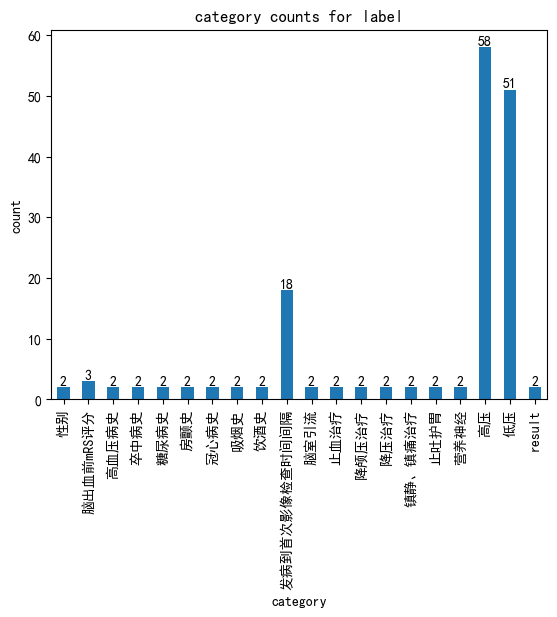

In [47]:
plt.rcParams['font.sans-serif'] = ['SimHei']
category_counts = train_data.nunique()

plt.figure()
category_counts.plot(kind='bar')
plt.title(f'category counts for label')
plt.xlabel('category')
plt.ylabel('count')
# 显示数字
for i, v in enumerate(category_counts):
    plt.text(i, v, str(v), ha='center', va='bottom')
    
plt.show()

In [48]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   性别             100 non-null    int64  
 1   脑出血前mRS评分      100 non-null    int64  
 2   高血压病史          100 non-null    int64  
 3   卒中病史           100 non-null    int64  
 4   糖尿病史           100 non-null    int64  
 5   房颤史            100 non-null    int64  
 6   冠心病史           100 non-null    int64  
 7   吸烟史            100 non-null    int64  
 8   饮酒史            100 non-null    int64  
 9   发病到首次影像检查时间间隔  100 non-null    float64
 10  脑室引流           100 non-null    int64  
 11  止血治疗           100 non-null    int64  
 12  降颅压治疗          100 non-null    int64  
 13  降压治疗           100 non-null    int64  
 14  镇静、镇痛治疗        100 non-null    int64  
 15  止吐护胃           100 non-null    int64  
 16  营养神经           100 non-null    int64  
 17  高压             100 non-null    int32  
 18  低压         

In [49]:
table_1_a = table_1.iloc[:, :12]
table_1_b = table_1.iloc[:, 12:]

In [50]:
import plotly.graph_objects as go
import pandas as pd
# 创建数据
data = train_data.iloc[:, 1:-1]

# 创建图表布局
fig = go.Figure()

# 添加每个变量的散点图
for column in data.columns:
    fig.add_trace(go.Scatter(
        x=[column] * len(data),
        y=data[column],
        mode='markers',
        name=column,
        marker=dict(
            size=8,
            line=dict(width=1),
            opacity=0.7
        )
    ))

# 设置图表布局
fig.update_layout(
    title='Multiple Indicator Strip Plot',
    xaxis=dict(title='Variable'),
    yaxis=dict(title='Value'),
    showlegend=False,
    width=900,
    height=600
)

# 显示图表
fig.show()

In [51]:
# 创建数据
data = train_data.iloc[:, 1:-1]

# 创建图表布局
fig = go.Figure()

# 添加每个变量的盒图
for column in data.columns:
    fig.add_trace(go.Box(
        y=data[column],
        name=column,
        boxpoints='all',
        jitter=0.3,
        pointpos=-1.8
    ))

# 设置图表布局
fig.update_layout(
    title='Box Plot',
    xaxis=dict(title='Variable'),
    yaxis=dict(title='Value'),
    showlegend=False,
    width=900,
    height=600
)

# 显示图表
fig.show()

In [52]:
# 创建数据
data = train_data.iloc[:, 1:-1]

# 创建图表布局
fig = go.Figure()

# 添加每个变量的散点图
for column in data.columns:
    fig.add_trace(go.Scatter(
        x=[column] * len(data),
        y=data[column],
        mode='markers',
        name=column,
        marker=dict(
            size=8,
            line=dict(width=1),
            opacity=0.7
        )
    ))

# 添加每个变量的小提琴图
for column in data.columns:
    fig.add_trace(go.Violin(
        y=data[column],
        name=column,
        box_visible=True,
        meanline_visible=True,
        fillcolor='lightgray',
        line_color='black'
    ))

# 设置图表布局
fig.update_layout(
    title='Scatter and Violin Plot',
    xaxis=dict(title='Variable'),
    yaxis=dict(title='Value'),
    showlegend=False,
    width=900,
    height=600
)

# 显示图表
fig.show()

In [53]:
train_data.shape

(100, 20)

In [54]:
# 数据分析
# for i in range(2, len(table_1.columns)-1):
#     subset1 = table_1[table_1['result'] == 0]
#     subset2 = table_1[table_1['result'] == 1]

#     plt.scatter(subset1['年龄'], subset1[table_1.columns[i]], color='red', label='true')
#     plt.scatter(subset2['年龄'], subset2[table_1.columns[i]], color='blue', label='false')

#     plt.xlabel('年龄')
#     plt.ylabel(table_1.columns[i])
#     plt.title(f'年龄与{table_1.columns[i]}关系图')
#     plt.legend()
#     plt.show()

c:\Users\MrFeng\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\utils.py:80: UserWarning:

Glyph 8722 (\N{MINUS SIGN}) missing from current font.

c:\Users\MrFeng\AppData\Local\Programs\Python\Python37\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning:

Glyph 8722 (\N{MINUS SIGN}) missing from current font.



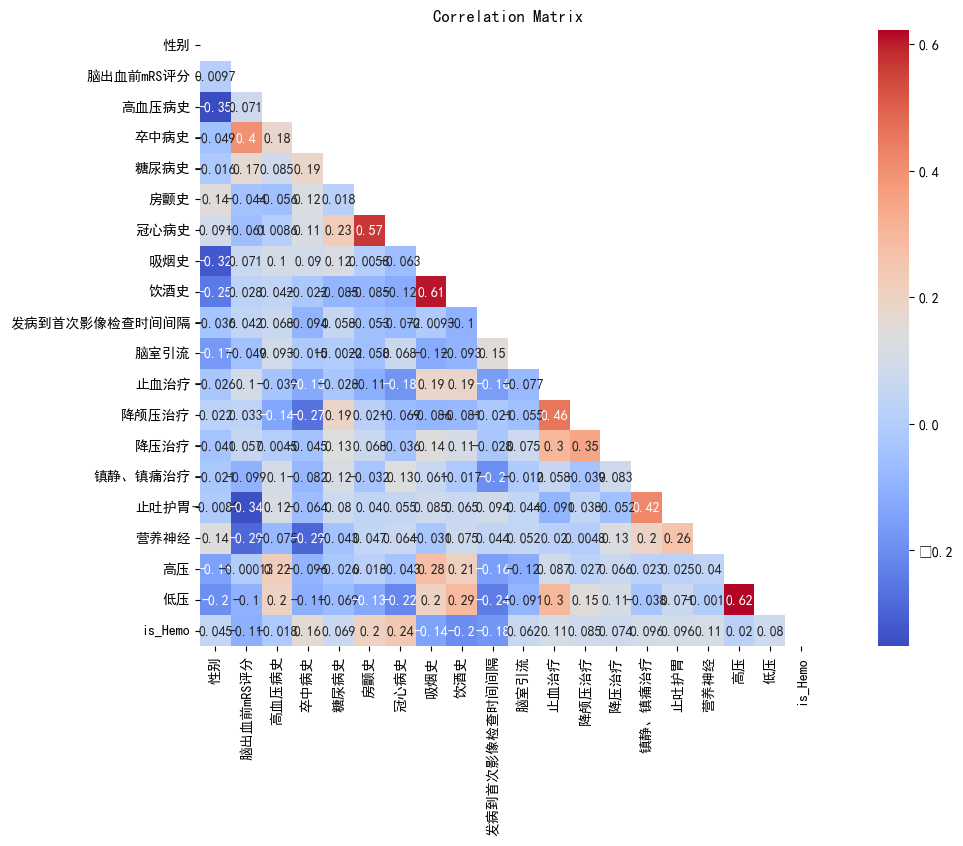

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 创建数据
data = train_data.iloc[:, :-1].assign(is_Hemo=train_label)  # 假设train_data的标签位于第一列

# 计算相关系数矩阵
corr_matrix = data.corr()

# 创建遮盖矩阵
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# 绘制相关矩阵
plt.figure(figsize=(16, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True, mask=mask)
plt.title('Correlation Matrix')
plt.show()

In [56]:
table_3 = pd.read_excel('../E题/数据/表3-患者影像信息血肿及水肿的形状及灰度分布.xlsx')
table_3

,备注,流水号,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,...,NCCT_original_firstorder_MeanAbsoluteDeviation,NCCT_original_firstorder_Mean,NCCT_original_firstorder_Median,NCCT_original_firstorder_Minimum,NCCT_original_firstorder_Range,NCCT_original_firstorder_RobustMeanAbsoluteDeviation,NCCT_original_firstorder_RootMeanSquared,NCCT_original_firstorder_Skewness,NCCT_original_firstorder_Uniformity,NCCT_original_firstorder_Variance
0,NaN,20160117000135,0.809020,0.452364,21.460961,47.441786,62.265560,51.884487,47.201695,66.105976,...,8.804495,60.479072,62.363129,25.625693,68.636402,6.426142,61.421799,-0.464143,0.115781,114.919202
1,NaN,20160117000328,0.765948,0.528562,31.533788,59.659533,59.033889,58.051701,59.033889,69.864154,...,7.011415,63.060397,63.564973,25.287045,70.502845,4.876413,63.676979,-0.196186,0.141840,78.143978
2,NaN,20160118001751,0.796400,0.587009,32.071978,54.636247,61.131007,61.522354,51.244512,65.559134,...,8.909079,63.057433,63.207367,25.162122,86.779325,5.970173,64.096201,0.158409,0.137676,132.083050
3,NaN,20160129000231,0.694317,0.421746,25.947301,61.523496,61.619802,46.754679,43.566042,62.880840,...,10.581386,48.338894,48.073538,8.273075,82.476919,7.699185,50.029409,-0.005145,0.109191,166.293121
4,NaN,20160209000219,0.799275,0.569239,15.224112,26.744665,39.319207,39.849718,37.000000,45.497253,...,8.845794,49.344928,50.737956,16.756305,61.928524,6.387522,50.518385,-0.384037,0.101547,117.185249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,NaN,20201220000450,0.827879,0.470224,31.216469,66.386440,60.207973,68.410526,54.626001,69.426220,...,6.200542,41.046376,41.498166,2.956345,68.718750,4.238372,41.807731,-0.347183,0.156049,63.081441
572,NaN,20201221000155,0.744377,0.472333,33.915553,71.804340,63.285069,65.855903,52.038447,68.782265,...,5.925110,36.124757,36.330849,-0.981156,68.236807,4.081957,36.899017,-0.211160,0.161276,56.539331
573,NaN,20201223000130,0.749719,0.435269,32.104800,73.758476,62.641839,69.354164,55.758407,70.320694,...,6.747741,33.486701,33.870047,-4.041351,79.282432,4.682721,34.553995,-0.178790,0.164277,72.619453
574,NaN,20201223002079,0.927183,0.579222,34.656447,59.832715,56.603887,68.883960,69.778220,78.879655,...,5.964170,42.195763,41.743571,8.313232,69.899800,4.474350,42.858022,-0.042917,0.169254,56.327579


c:\Users\MrFeng\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\utils.py:80: UserWarning:

Glyph 8722 (\N{MINUS SIGN}) missing from current font.

c:\Users\MrFeng\AppData\Local\Programs\Python\Python37\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning:

Glyph 8722 (\N{MINUS SIGN}) missing from current font.



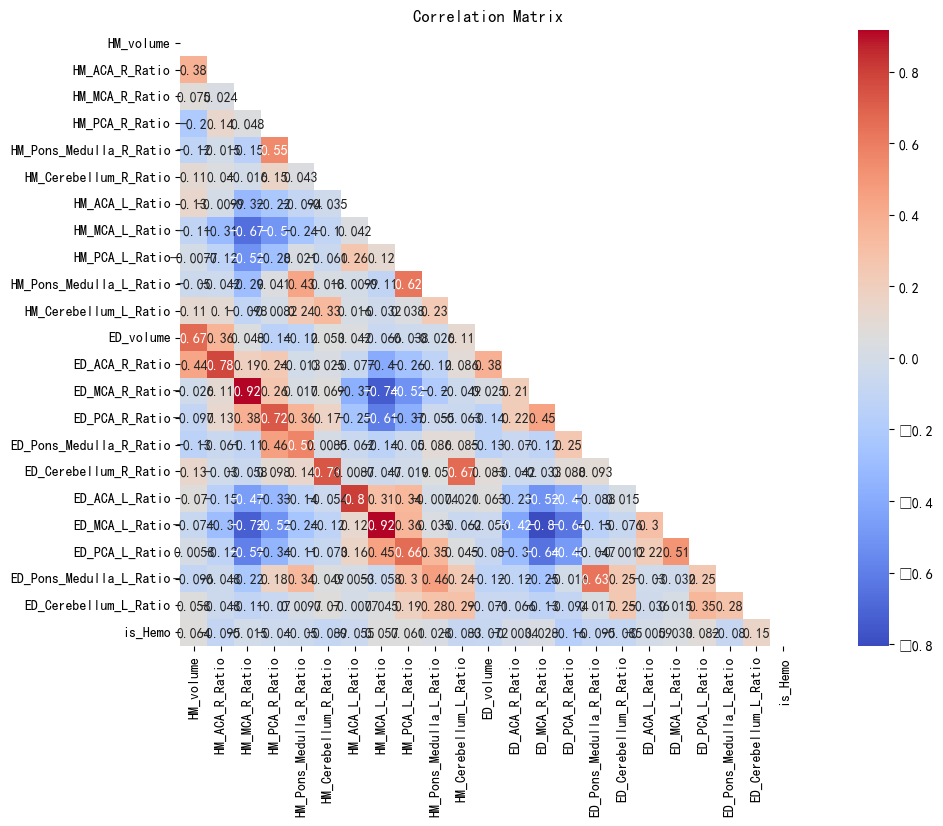

In [57]:
# 创建数据
data = table_2.iloc[:100, 2:24].assign(is_Hemo=train_label)  # 假设train_data的标签位于第一列

# 计算相关系数矩阵
corr_matrix = data.corr()

# 创建遮盖矩阵
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# 绘制相关矩阵
plt.figure(figsize=(16, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True, mask=mask)
plt.title('Correlation Matrix')
plt.show()

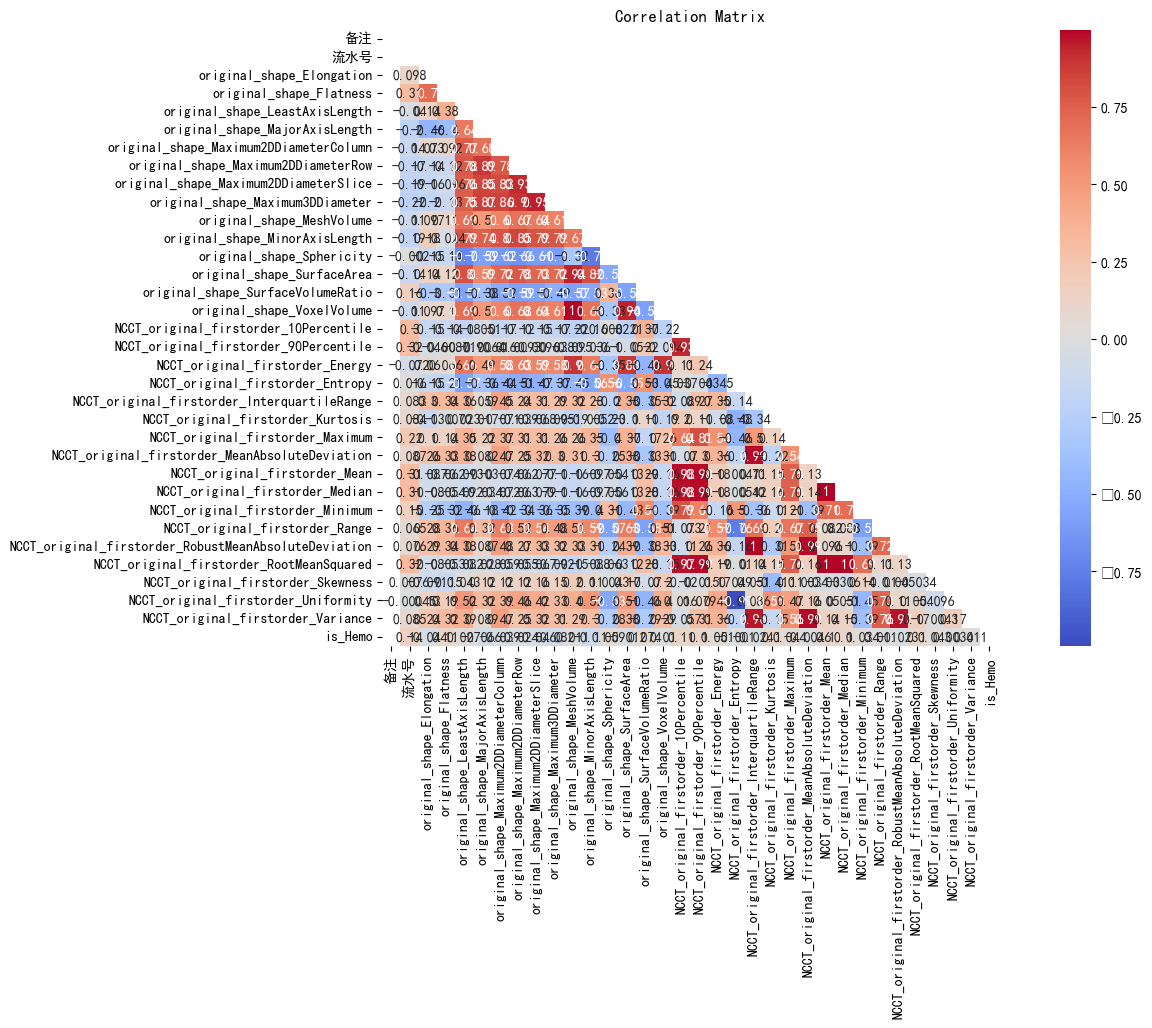

In [58]:
# 创建数据
data = table_3.iloc[:100, :].assign(is_Hemo=train_label)  # 假设train_data的标签位于第一列

# 计算相关系数矩阵
corr_matrix = data.corr()

# 创建遮盖矩阵
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# 绘制相关矩阵
plt.figure(figsize=(16, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True, mask=mask)
plt.title('Correlation Matrix')
plt.show()

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# 创建逻辑回归模型对象
model = LogisticRegression()

# 定义超参数的取值范围
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

# 创建 GridSearchCV 对象
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

# 使用训练集进行网格搜索调优
grid_search.fit(train_data, train_label)

# 输出最佳超参数组合
print(grid_search.best_params_)

# 输出最佳模型
best_model = grid_search.best_estimator_

# 使用训练集获取模型的输出概率
train_prob = best_model.predict_proba(train_data)
test_prob = best_model.predict_proba(test_data)
prob_issue1 = [f"{x:.4f}" for x in train_prob[:, 1:].reshape(-1)] + [f"{x:.4f}" for x in test_prob[:, 1:].reshape(-1)]
print(prob_issue1)

{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
['0.0112', '0.0060', '0.9212', '0.0110', '0.9737', '0.0052', '0.0030', '0.0178', '0.9624', '0.0039', '0.0166', '0.0091', '0.0306', '0.0267', '0.0099', '0.0230', '0.9580', '0.0227', '0.0043', '0.0378', '0.0158', '0.0248', '0.0024', '0.0136', '0.0025', '0.0314', '0.0155', '0.0161', '0.0135', '0.0039', '0.0174', '0.0187', '0.9653', '0.0266', '0.0174', '0.9480', '0.0080', '0.9674', '0.9472', '0.0099', '0.0121', '0.0081', '0.0080', '0.0052', '0.0094', '0.0128', '0.0166', '0.9030', '0.0055', '0.0124', '0.0190', '0.0239', '0.0327', '0.9709', '0.0416', '0.0086', '0.9816', '0.0082', '0.0255', '0.9697', '0.9646', '0.0130', '0.0023', '0.0328', '0.0357', '0.0130', '0.0097', '0.0132', '0.0158', '0.9732', '0.0180', '0.0135', '0.0249', '0.0088', '0.0125', '0.9562', '0.9758', '0.0093', '0.9752', '0.9466', '0.9672', '0.0035', '0.0062', '0.0085', '0.0156', '0.0127', '0.0162', '0.0189', '0.0174', '0.0113', '0.0193', '0.9740', '0.0082', '0.0112', '0.9080', 

In [60]:
sum_resid = sum(np.abs(test_label-test_prob[:, 1:].reshape(-1)))

sum_resid

1.248100394179697

In [61]:
# data = table_1.iloc[:, 2:]
# data1 = data.drop(columns=['性别', '营养神经'])
# data1.head()

In [62]:
# train_data, test_data = data1.iloc[:100, :], data1.iloc[100:, :]

In [63]:
# # 创建逻辑回归模型对象
# model1 = LogisticRegression()

# # 定义超参数的取值范围
# param_grid = {
#     'C': [0.1, 1, 10],
#     'penalty': ['l1', 'l2'],
#     'solver': ['liblinear']
# }

# # 创建 GridSearchCV 对象
# grid_search = GridSearchCV(estimator=model1, param_grid=param_grid, cv=5)

# # 使用训练集进行网格搜索调优
# grid_search.fit(train_data, train_label)

# # 输出最佳超参数组合
# print(grid_search.best_params_)

# # 输出最佳模型
# best_model = grid_search.best_estimator_

# # 使用训练集获取模型的输出概率
# train_prob = best_model.predict_proba(train_data)
# test_prob = best_model.predict_proba(test_data)
# prob_issue1 = [f"{x:.4f}" for x in train_prob[:, 1:].reshape(-1)] + [f"{x:.4f}" for x in test_prob[:, 1:].reshape(-1)]
# print(prob_issue1)

In [64]:
# sum_resid = sum(np.abs(test_label-test_prob[:, 1:].reshape(-1)))

# sum_resid

In [65]:
from openpyxl import load_workbook

# 打开答案文件.xlsx
workbook = load_workbook('../E题/数据/表4-答案文件.xlsx')

# 选择活动的工作表
worksheet = workbook.active

# 获取起始单元格的列号和行号
prob_start_column = 'E'
start_row = 4

# 逐行写入result列表的元素
for i in range(len(prob_issue1)):
    # 定位
    prob_current_column = prob_start_column
    prob_cell_coordinate = f"{prob_current_column}{start_row + i}"
    # 写入
    worksheet[prob_cell_coordinate] = prob_issue1[i]

# 保存工作簿到文件
workbook.save('../E题/数据/表4-答案文件.xlsx')

# 2. 水肿血肿与治疗的建模
## a. 画曲线 && 计算残差
### a.1 拟合曲线
通过x_train【发病到检查的时间差】和y_train【到检查时刻的肿块体积】绘制一条拟合曲线

In [66]:
# 筛选table2的列
index = [f'随访{i}流水号' for i in range(1, 9)]
index.insert(0, '首次检查流水号')
table_indices, schedule_indices = [], [2*i for i in range(1, len(index)+1)]
for i in index:
    table_indices.append(table_2.columns.get_loc(i) + 12)
    
Y_train = table_2.iloc[:100 , table_indices]
schedule_1_issue2 = schedule_1.iloc[:100, schedule_indices]
Y_train.head()

,ED_volume,ED_volume.1,ED_volume.2,ED_volume.3,ED_volume.4,ED_volume.5,ED_volume.6,ED_volume.7,ED_volume.8
0,48919,57898.0,81747.0,107793.0,126558.0,NaN,NaN,NaN,NaN
1,23526,23390.0,28415.0,34868.0,0.0,NaN,NaN,NaN,NaN
2,32621,41292.0,49767.0,NaN,NaN,NaN,NaN,NaN,NaN
3,22191,18956.0,9540.0,5204.0,NaN,NaN,NaN,NaN,NaN
4,47392,23182.0,12898.0,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
# 创建空的 x_train DataFrame，与 schedule_1_issue2 有相同的结构
X_train = pd.DataFrame(columns=schedule_1_issue2.columns)

# 遍历 schedule_1_issue2 中的每一行
for i in range(len(schedule_1_issue2)):
    # 获取当前行的时间戳
    current_row = schedule_1_issue2.iloc[i]

    # 创建空的 diff 列表，用于存储时间差值
    diff = []

    # 遍历当前行的每个单元格
    for j in range(len(current_row)):
        # 判断当前单元格是否为空
        if pd.isnull(current_row[j]):
            # 如果当前单元格为空，则不进行处理，将时间差值设置为NaN
            diff.append(float('nan'))
        else:
            # 获取前一个单元格的时间戳
            if j == 0:
                previous_cell = pd.to_datetime(current_row[j])
            else:
                previous_cell = schedule_1_issue2.iloc[i, j - 1]

            # 将当前单元格时间戳转换为 datetime 类型
            current_cell = pd.to_datetime(current_row[j])

            # 计算时间差，并将结果添加到 diff 列表
            time_diff = current_cell - previous_cell + table_1_issue1.iloc[i]['发病到首次影像检查时间间隔']
            diff.append(round(time_diff.total_seconds() / 3600, 2))

    # 将 diff 列表添加到 x_train
    X_train.loc[i] = diff

# 打印处理后的 x_train
X_train.head()

,入院首次检查时间点,随访1时间点,随访2时间点,随访3时间点,随访4时间点,随访5时间点,随访6时间点,随访7时间点,随访8时间点
0,2.5,8.27,126.34,130.13,168.30,NaN,NaN,NaN,NaN
1,3.0,14.92,57.30,381.79,674.18,NaN,NaN,NaN,NaN
2,2.0,9.52,32.07,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,16.97,67.87,144.66,NaN,NaN,NaN,NaN,NaN
4,5.0,26.47,76.48,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
X_train

,入院首次检查时间点,随访1时间点,随访2时间点,随访3时间点,随访4时间点,随访5时间点,随访6时间点,随访7时间点,随访8时间点
0,2.5,8.27,126.34,130.13,168.30,NaN,NaN,NaN,NaN
1,3.0,14.92,57.30,381.79,674.18,NaN,NaN,NaN,NaN
2,2.0,9.52,32.07,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,16.97,67.87,144.66,NaN,NaN,NaN,NaN,NaN
4,5.0,26.47,76.48,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
95,1.0,13.76,75.22,168.14,169.38,173.14,NaN,NaN,NaN
96,3.0,31.93,142.47,NaN,NaN,NaN,NaN,NaN,NaN
97,2.5,42.76,147.40,385.34,335.37,NaN,NaN,NaN,NaN
98,3.0,17.67,27.86,NaN,NaN,NaN,NaN,NaN,NaN


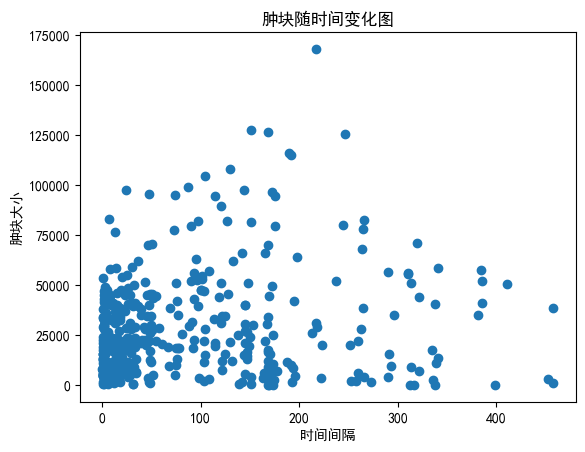

In [69]:
import numpy as np
import matplotlib.pyplot as plt

# 获取对应位置的x和y值
x_values = X_train.values.flatten().tolist()
y_values = Y_train.values.flatten().tolist()

# 创建筛选后的数据列表
filtered_x = []
filtered_y = []

# 根据条件筛选数据
for x, y in zip(x_values, y_values):
    if x <= 500:
        filtered_x.append(x)
        filtered_y.append(y)

# 绘制散点图
plt.scatter(filtered_x, filtered_y)

# 设置横纵坐标标签
plt.xlabel('时间间隔')
plt.ylabel('肿块大小')
plt.title('肿块随时间变化图')

# 显示图像
plt.show()

方案一：多项式回归模型

In [70]:
# 找到空数据所在的索引
nan_indices = np.isnan(filtered_x) | np.isnan(filtered_y)

# 获取空数据所在的索引
indices = np.where(nan_indices)[0]

# 删除空数据所在的索引对应的元素
x = np.delete(filtered_x, indices)
y = np.delete(filtered_y, indices)

In [71]:
len(x), len(y)

(421, 421)

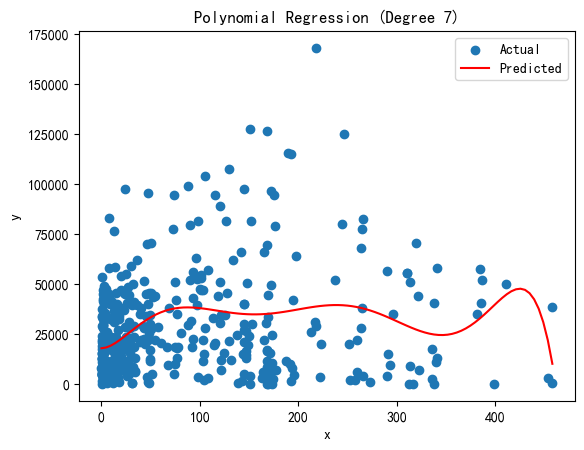

7717288.198635254 7


In [72]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# 将 train_data 转换为二维数组
x_train = np.array(x).reshape(-1, 1)

# 将 train_label 转换为二维数组
y_train = np.array(y).reshape(-1, 1)

best_degree = None
best_residual_sum = float('inf')

# 尝试不同的多项式阶数
for degree in range(1, 10):
    # 使用多项式特征转换
    poly_features = PolynomialFeatures(degree=degree)
    x_train_poly = poly_features.fit_transform(x_train)

    # 创建多项式回归模型并进行训练
    model = LinearRegression()
    model.fit(x_train_poly, y_train)

    # 使用模型对训练数据进行预测
    y_train_pred = model.predict(x_train_poly)

    # 计算残差和
    residual_sum = np.sum(np.abs(y_train - y_train_pred))

    # 更新最小残差和和对应的阶数
    if residual_sum < best_residual_sum:
        best_residual_sum = residual_sum
        best_degree = degree

# 使用最佳阶数重新训练模型
poly_features = PolynomialFeatures(degree=best_degree)
x_train_poly = poly_features.fit_transform(x_train)
model = LinearRegression()
model.fit(x_train_poly, y_train)

# 生成测试数据
x_test = np.linspace(np.min(x_train), np.max(x_train), 100).reshape(-1, 1)
x_test_poly = poly_features.transform(x_test)

# 使用模型进行预测
y_pred = model.predict(x_test_poly)

# 绘制真实值和预测值的图像
plt.scatter(x_train, y_train, label='Actual')
plt.plot(x_test, y_pred, color='red', label='Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial Regression (Degree {})'.format(best_degree))
plt.legend()
plt.show()

# 使用模型对训练数据进行预测
y_train_pred = model.predict(x_train_poly)

# 计算最终的残差和
residual_sum = np.sum(np.abs(y_train - y_train_pred))

# 打印最终的残差和
print(residual_sum, best_degree)

方案二：随机森林

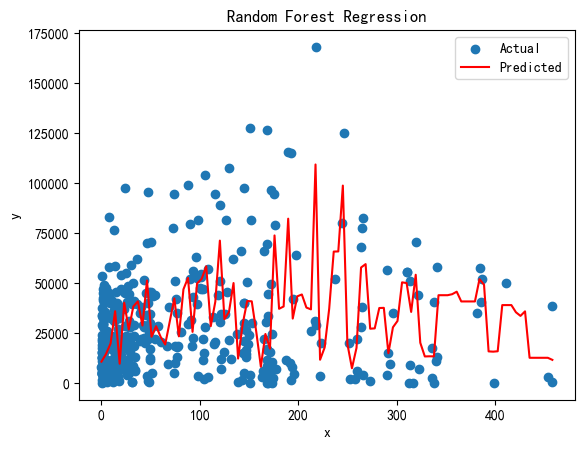

3936920.376102996


In [73]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor

# 将 train_data 转换为二维数组
x_train = np.array(x).reshape(-1, 1)

# 将 train_label 转换为一维数组
y_train = np.array(y)

# 创建随机森林回归模型并进行训练
model = RandomForestRegressor(n_estimators=100)
model.fit(x_train, y_train)

# 生成测试数据
x_test = np.linspace(np.min(x_train), np.max(x_train), 100).reshape(-1, 1)

# 使用模型进行预测
y_pred = model.predict(x_test)

# 绘制真实值和预测值的图像
plt.scatter(x_train, y_train, label='Actual')
plt.plot(x_test, y_pred, color='red', label='Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Random Forest Regression')
plt.legend()
plt.show()
# 使用模型对训练数据进行预测
y_train_pred = model.predict(x_train)

# 计算最终的残差和
residual_sum = np.sum(np.abs(y_train - y_train_pred))

# 打印最终的残差和
print(residual_sum)

In [74]:
x_values_without_nan = np.nan_to_num(x_values)
y_values_without_nan = np.nan_to_num(y_values)
y_values_pred = model.predict(x_values_without_nan.reshape(-1, 1))
# 获取x_values_without_nan中数值为0的索引位置
zero_indices = np.where(x_values_without_nan == 0)

# 将y_values_pred中对应索引位置的值替换为0
y_values_pred[zero_indices] = 0
# 计算y_values_pred和y_values_without_nan之间的绝对值差
abs_diff = y_values_pred - y_values_without_nan

# 每9个数据求和并存储在resid_list中
resid_list = []
for i in range(0, len(abs_diff), 9):
    resid_sum = np.sum(abs_diff[i:i+5])
    resid_list.append(resid_sum / 9)

# resid_list

In [75]:
# resid = y_train.reshape(-1) - y_train_pred
# 打开答案文件.xlsx
workbook = load_workbook('../E题/数据/表4-答案文件.xlsx')

# 选择活动的工作表
worksheet = workbook.active

# 获取起始单元格的列号和行号
start_column = 'F'
start_row = 4

# 逐行写入result列表的元素
for i in range(len(resid_list)):
    # 定位
    current_column = start_column
    current_column = start_column
    cell_coordinate = f"{current_column}{start_row + i}"
    # 写入
    worksheet[cell_coordinate] = resid_list[i]

# 保存工作簿到文件
workbook.save('../E题/数据/表4-答案文件.xlsx')

### b 分为抽烟喝酒四类亚组
分为：抽烟 喝酒四组 [0, 0] [0, 1] [1, 0] [1, 1]
通过索引列表分组

In [76]:
train_table_1 = table_1.iloc[:100, :]
idx_1 = train_table_1[(train_table_1["吸烟史"] == 1) & (train_table_1["饮酒史"] == 1)].index.tolist()
idx_2 = train_table_1[(train_table_1["吸烟史"] == 1) & (train_table_1["饮酒史"] == 0)].index.tolist()
idx_3 = train_table_1[(train_table_1["吸烟史"] == 0) & (train_table_1["饮酒史"] == 1)].index.tolist()
idx_4 = train_table_1[(train_table_1["吸烟史"] == 0) & (train_table_1["饮酒史"] == 0)].index.tolist()
len(idx_1) + len(idx_2) + len(idx_3) + len(idx_4)

100

In [77]:
# 根据索引分类x_train的行
x_train_1 = X_train.loc[idx_1]
x_train_2 = X_train.loc[idx_2]
x_train_3 = X_train.loc[idx_3]
x_train_4 = X_train.loc[idx_4]

x_train_1.shape, x_train_2.shape, x_train_3.shape, x_train_4.shape

((10, 9), (9, 9), (2, 9), (79, 9))

In [78]:
# 根据索引分类x_train的行
y_train_1 = Y_train.loc[idx_1]
y_train_2 = Y_train.loc[idx_2]
y_train_3 = Y_train.loc[idx_3]
y_train_4 = Y_train.loc[idx_4]

y_train_1.shape, y_train_2.shape, y_train_3.shape, y_train_4.shape

((10, 9), (9, 9), (2, 9), (79, 9))

In [79]:
# 填充缺失值为均值
x_train_1 = x_train_1.fillna(0)
x_train_2 = x_train_2.fillna(0)
x_train_3 = x_train_3.fillna(0)
x_train_4 = x_train_4.fillna(0)

y_train_1 = y_train_1.fillna(0)
y_train_2 = y_train_2.fillna(0)
y_train_3 = y_train_3.fillna(0)
y_train_4 = y_train_4.fillna(0)

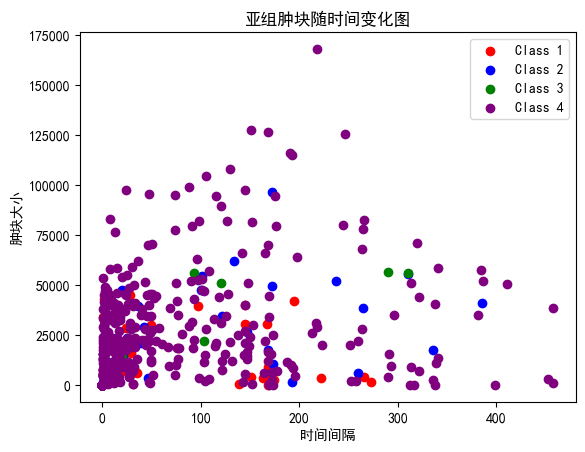

In [80]:
import numpy as np
import matplotlib.pyplot as plt

# 获取对应位置的x和y值
x_values_1 = x_train_1.values.flatten().tolist()
y_values_1 = y_train_1.values.flatten().tolist()
x_values_2 = x_train_2.values.flatten().tolist()
y_values_2 = y_train_2.values.flatten().tolist()
x_values_3 = x_train_3.values.flatten().tolist()
y_values_3 = y_train_3.values.flatten().tolist()
x_values_4 = x_train_4.values.flatten().tolist()
y_values_4 = y_train_4.values.flatten().tolist()

# 创建筛选后的数据列表
filtered_x1 = []
filtered_y1 = []
filtered_x2 = []
filtered_y2 = []
filtered_x3 = []
filtered_y3 = []
filtered_x4 = []
filtered_y4 = []

# 根据条件筛选数据
for x, y in zip(x_values_1, y_values_1):
    if x <= 500:
        filtered_x1.append(x)
        filtered_y1.append(y)

for x, y in zip(x_values_2, y_values_2):
    if x <= 500:
        filtered_x2.append(x)
        filtered_y2.append(y)

for x, y in zip(x_values_3, y_values_3):
    if x <= 500:
        filtered_x3.append(x)
        filtered_y3.append(y)

for x, y in zip(x_values_4, y_values_4):
    if x <= 500:
        filtered_x4.append(x)
        filtered_y4.append(y)

# 绘制散点图
plt.scatter(filtered_x1, filtered_y1, c='red', label='Class 1')
plt.scatter(filtered_x2, filtered_y2, c='blue', label='Class 2')
plt.scatter(filtered_x3, filtered_y3, c='green', label='Class 3')
plt.scatter(filtered_x4, filtered_y4, c='purple', label='Class 4')

# 设置横纵坐标标签
plt.xlabel('时间间隔')
plt.ylabel('肿块大小')
plt.title('亚组肿块随时间变化图')

# 添加图例
plt.legend()

# 显示图像
plt.show()

In [81]:
# 找到空数据所在的索引
nan_indices = np.isnan(filtered_x1) | np.isnan(filtered_y1)

# 获取空数据所在的索引
indices = np.where(nan_indices)[0]

# 删除空数据所在的索引对应的元素
x1 = np.delete(filtered_x1, indices)
y1 = np.delete(filtered_y1, indices)

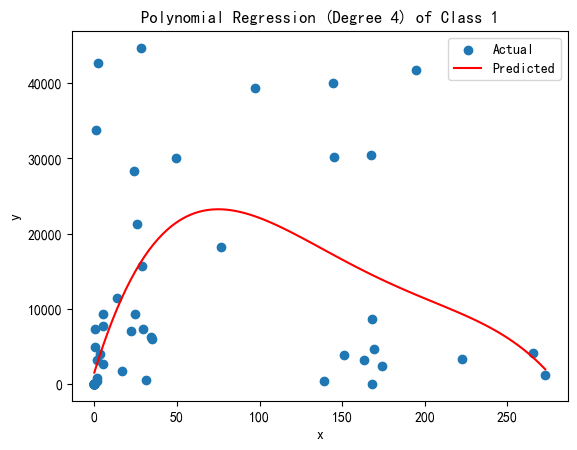

491088.6204467495 4


In [82]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# 将 train_data 转换为二维数组
x_train = np.array(x1).reshape(-1, 1)

# 将 train_label 转换为二维数组
y_train = np.array(y1).reshape(-1, 1)

best_degree = None
best_residual_sum = float('inf')

# 尝试不同的多项式阶数
for degree in range(1, 10):
    # 使用多项式特征转换
    poly_features = PolynomialFeatures(degree=degree)
    x_train_poly = poly_features.fit_transform(x_train)

    # 创建多项式回归模型并进行训练
    model = LinearRegression()
    model.fit(x_train_poly, y_train)

    # 使用模型对训练数据进行预测
    y_train_pred = model.predict(x_train_poly)

    # 计算残差和
    residual_sum = np.sum(np.abs(y_train - y_train_pred))

    # 更新最小残差和和对应的阶数
    if residual_sum < best_residual_sum:
        best_residual_sum = residual_sum
        best_degree = degree

# 使用最佳阶数重新训练模型
poly_features = PolynomialFeatures(degree=best_degree)
x_train_poly = poly_features.fit_transform(x_train)
model = LinearRegression()
model.fit(x_train_poly, y_train)

# 生成测试数据
x_test = np.linspace(np.min(x_train), np.max(x_train), 100).reshape(-1, 1)
x_test_poly = poly_features.transform(x_test)

# 使用模型进行预测
y_pred = model.predict(x_test_poly)

# 绘制真实值和预测值的图像
plt.scatter(x_train, y_train, label='Actual')
plt.plot(x_test, y_pred, color='red', label='Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial Regression (Degree {}) of Class 1'.format(best_degree))
plt.legend()
plt.show()

# 使用模型对训练数据进行预测
y_train_pred = model.predict(x_train_poly)

# 计算最终的残差和
residual_sum = np.sum(np.abs(y_train - y_train_pred))

# 打印最终的残差和
print(residual_sum, best_degree)

In [83]:
resid_list2 = [0 for _ in range(100)]
i = 0
for idx in idx_1:
    resid = np.mean((y_train - y_train_pred)[i:i+8])
    resid_list2[idx] = resid
    i += 1

In [84]:
# 找到空数据所在的索引
nan_indices = np.isnan(filtered_x2) | np.isnan(filtered_y2)

# 获取空数据所在的索引
indices = np.where(nan_indices)[0]

# 删除空数据所在的索引对应的元素
x2 = np.delete(filtered_x2, indices)
y2 = np.delete(filtered_y2, indices)

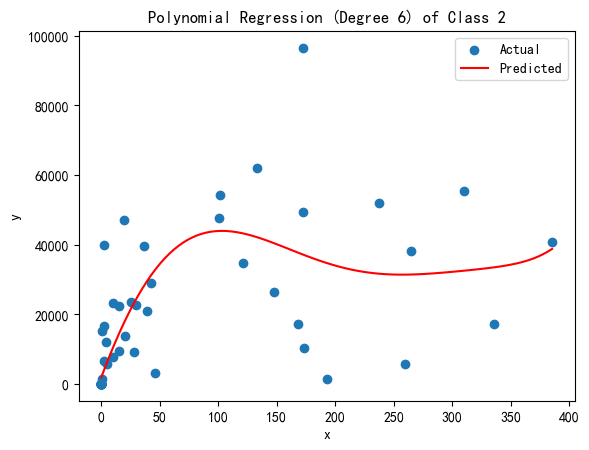

584718.0022469633 6


In [85]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# 将 train_data 转换为二维数组
x_train = np.array(x2).reshape(-1, 1)

# 将 train_label 转换为二维数组
y_train = np.array(y2).reshape(-1, 1)

best_degree = None
best_residual_sum = float('inf')

# 尝试不同的多项式阶数
for degree in range(1, 10):
    # 使用多项式特征转换
    poly_features = PolynomialFeatures(degree=degree)
    x_train_poly = poly_features.fit_transform(x_train)

    # 创建多项式回归模型并进行训练
    model = LinearRegression()
    model.fit(x_train_poly, y_train)

    # 使用模型对训练数据进行预测
    y_train_pred = model.predict(x_train_poly)

    # 计算残差和
    residual_sum = np.sum(np.abs(y_train - y_train_pred))

    # 更新最小残差和和对应的阶数
    if residual_sum < best_residual_sum:
        best_residual_sum = residual_sum
        best_degree = degree

# 使用最佳阶数重新训练模型
poly_features = PolynomialFeatures(degree=best_degree)
x_train_poly = poly_features.fit_transform(x_train)
model = LinearRegression()
model.fit(x_train_poly, y_train)

# 生成测试数据
x_test = np.linspace(np.min(x_train), np.max(x_train), 100).reshape(-1, 1)
x_test_poly = poly_features.transform(x_test)

# 使用模型进行预测
y_pred = model.predict(x_test_poly)

# 绘制真实值和预测值的图像
plt.scatter(x_train, y_train, label='Actual')
plt.plot(x_test, y_pred, color='red', label='Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial Regression (Degree {}) of Class 2'.format(best_degree))
plt.legend()
plt.show()

# 使用模型对训练数据进行预测
y_train_pred = model.predict(x_train_poly)

# 计算最终的残差和
residual_sum = np.sum(np.abs(y_train - y_train_pred))

# 打印最终的残差和
print(residual_sum, best_degree)

In [86]:
i = 0
for idx in idx_2:
    resid = np.mean((y_train - y_train_pred)[i:i+9])
    resid_list2[idx] = resid
    i += 1

In [87]:
# 找到空数据所在的索引
nan_indices = np.isnan(filtered_x3) | np.isnan(filtered_y3)

# 获取空数据所在的索引
indices = np.where(nan_indices)[0]

# 删除空数据所在的索引对应的元素
x3 = np.delete(filtered_x3, indices)
y3 = np.delete(filtered_y3, indices)

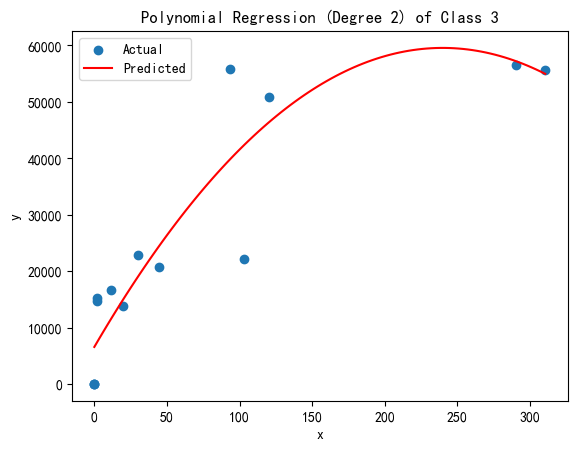

90587.70248224077 2


In [88]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# 将 train_data 转换为二维数组
x_train = np.array(x3).reshape(-1, 1)

# 将 train_label 转换为二维数组
y_train = np.array(y3).reshape(-1, 1)

best_degree = None
best_residual_sum = float('inf')

# 尝试不同的多项式阶数
for degree in range(1, 4):
    # 使用多项式特征转换
    poly_features = PolynomialFeatures(degree=degree)
    x_train_poly = poly_features.fit_transform(x_train)

    # 创建多项式回归模型并进行训练
    model = LinearRegression()
    model.fit(x_train_poly, y_train)

    # 使用模型对训练数据进行预测
    y_train_pred = model.predict(x_train_poly)

    # 计算残差和
    residual_sum = np.sum(np.abs(y_train - y_train_pred))

    # 更新最小残差和和对应的阶数
    if residual_sum < best_residual_sum:
        best_residual_sum = residual_sum
        best_degree = degree

# 使用最佳阶数重新训练模型
poly_features = PolynomialFeatures(degree=best_degree)
x_train_poly = poly_features.fit_transform(x_train)
model = LinearRegression()
model.fit(x_train_poly, y_train)

# 生成测试数据
x_test = np.linspace(np.min(x_train), np.max(x_train), 100).reshape(-1, 1)
x_test_poly = poly_features.transform(x_test)

# 使用模型进行预测
y_pred = model.predict(x_test_poly)

# 绘制真实值和预测值的图像
plt.scatter(x_train, y_train, label='Actual')
plt.plot(x_test, y_pred, color='red', label='Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial Regression (Degree {}) of Class 3'.format(best_degree))
plt.legend()
plt.show()

# 使用模型对训练数据进行预测
y_train_pred = model.predict(x_train_poly)

# 计算最终的残差和
residual_sum = np.sum(np.abs(y_train - y_train_pred))

# 打印最终的残差和
print(residual_sum, best_degree)

In [89]:
i = 0
for idx in idx_3:
    resid = np.mean((y_train - y_train_pred)[i:i+7])
    resid_list2[idx] = resid
    i += 1

In [90]:
# 找到空数据所在的索引
nan_indices = np.isnan(filtered_x4) | np.isnan(filtered_y4)

# 获取空数据所在的索引
indices = np.where(nan_indices)[0]

# 删除空数据所在的索引对应的元素
x4 = np.delete(filtered_x4, indices)
y4 = np.delete(filtered_y4, indices)

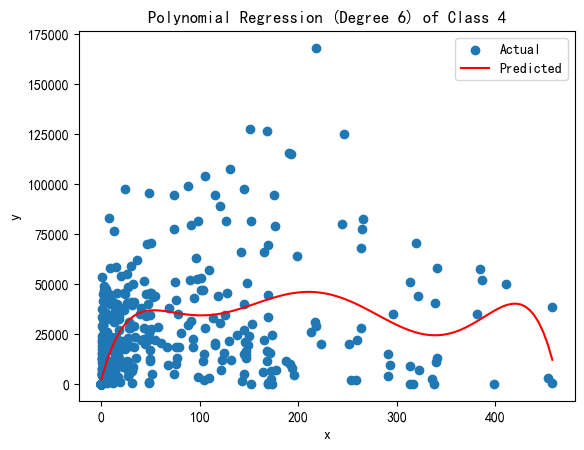

7497384.660273455 6


In [91]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# 将 train_data 转换为二维数组
x_train = np.array(x4).reshape(-1, 1)

# 将 train_label 转换为二维数组
y_train = np.array(y4).reshape(-1, 1)

best_degree = None
best_residual_sum = float('inf')

# 尝试不同的多项式阶数
for degree in range(1, 10):
    # 使用多项式特征转换
    poly_features = PolynomialFeatures(degree=degree)
    x_train_poly = poly_features.fit_transform(x_train)

    # 创建多项式回归模型并进行训练
    model = LinearRegression()
    model.fit(x_train_poly, y_train)

    # 使用模型对训练数据进行预测
    y_train_pred = model.predict(x_train_poly)

    # 计算残差和
    residual_sum = np.sum(np.abs(y_train - y_train_pred))

    # 更新最小残差和和对应的阶数
    if residual_sum < best_residual_sum:
        best_residual_sum = residual_sum
        best_degree = degree

# 使用最佳阶数重新训练模型
poly_features = PolynomialFeatures(degree=best_degree)
x_train_poly = poly_features.fit_transform(x_train)
model = LinearRegression()
model.fit(x_train_poly, y_train)

# 生成测试数据
x_test = np.linspace(np.min(x_train), np.max(x_train), 100).reshape(-1, 1)
x_test_poly = poly_features.transform(x_test)

# 使用模型进行预测
y_pred = model.predict(x_test_poly)

# 绘制真实值和预测值的图像
plt.scatter(x_train, y_train, label='Actual')
plt.plot(x_test, y_pred, color='red', label='Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial Regression (Degree {}) of Class 4'.format(best_degree))
plt.legend()
plt.show()

# 使用模型对训练数据进行预测
y_train_pred = model.predict(x_train_poly)

# 计算最终的残差和
residual_sum = np.sum(np.abs(y_train - y_train_pred))

# 打印最终的残差和
print(residual_sum, best_degree)

In [92]:
i = 0
for idx in idx_4:
    resid = np.mean((y_train - y_train_pred)[i:i+9])
    resid_list2[idx] = resid
    i += 1

In [93]:
from openpyxl import load_workbook

# 打开答案文件.xlsx
workbook = load_workbook('../E题/数据/表4-答案文件.xlsx')

# 选择活动的工作表
worksheet = workbook.active

# 获取起始单元格的列号和行号
prob_start_column = 'G'
start_row = 4

# 逐行写入result列表的元素
for i in range(len(resid_list2)):
    # 定位
    prob_current_column = prob_start_column
    prob_cell_coordinate = f"{prob_current_column}{start_row + i}"
    # 写入
    worksheet[prob_cell_coordinate] = resid_list2[i]

# 写入内容1到指定单元格
for i, value in enumerate(idx_1):
    # 计算目标单元格的行和列索引
    row = 'H'
    column = value + 4

    # 将内容1写入目标单元格
    worksheet[f"{row}{column}"] = 1

for i, value in enumerate(idx_2):
    # 计算目标单元格的行和列索引
    row = 'H'
    column = value + 4

    # 将内容1写入目标单元格
    worksheet[f"{row}{column}"] = 2

for i, value in enumerate(idx_3):
    # 计算目标单元格的行和列索引
    row = 'H'
    column = value + 4

    # 将内容1写入目标单元格
    worksheet[f"{row}{column}"] = 3

for i, value in enumerate(idx_4):
    # 计算目标单元格的行和列索引
    row = 'H'
    column = value + 4

    # 将内容1写入目标单元格
    worksheet[f"{row}{column}"] = 4

# 保存工作簿到文件
workbook.save('../E题/数据/表4-答案文件.xlsx')

### c. 水肿治疗手段

In [94]:
def calculate_difference(row):
    first_valid = row.first_valid_index()  # 获取第一个非NaN值的索引
    last_valid = row.last_valid_index()  # 获取最后一个非NaN值的索引
    if first_valid is None or last_valid is None:  # 如果没有非NaN值，则返回NaN
        return np.nan
    else:
        return row[first_valid] - row[last_valid]  # 计算差值

In [95]:
Y_train['水肿体积差'] = Y_train.apply(calculate_difference, axis=1)
table_1_issue2 = pd.concat([table_1.iloc[:100, -10:-3], Y_train['水肿体积差']], axis=1)
table_1_issue2

,脑室引流,止血治疗,降颅压治疗,降压治疗,镇静、镇痛治疗,止吐护胃,营养神经,水肿体积差
0,0,1,1,1,1,1,1,-77639.0
1,0,1,1,1,0,1,1,23526.0
2,0,1,1,1,1,1,1,-17146.0
3,0,1,1,1,0,0,0,16987.0
4,0,1,1,0,0,1,1,34494.0
...,...,...,...,...,...,...,...,...
95,0,0,0,1,1,1,1,5951.0
96,0,1,1,1,1,1,1,8911.0
97,0,1,1,1,1,1,1,22580.0
98,1,1,1,1,1,1,1,-21280.0


c:\Users\MrFeng\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\utils.py:80: UserWarning:

Glyph 8722 (\N{MINUS SIGN}) missing from current font.

c:\Users\MrFeng\AppData\Local\Programs\Python\Python37\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning:

Glyph 8722 (\N{MINUS SIGN}) missing from current font.



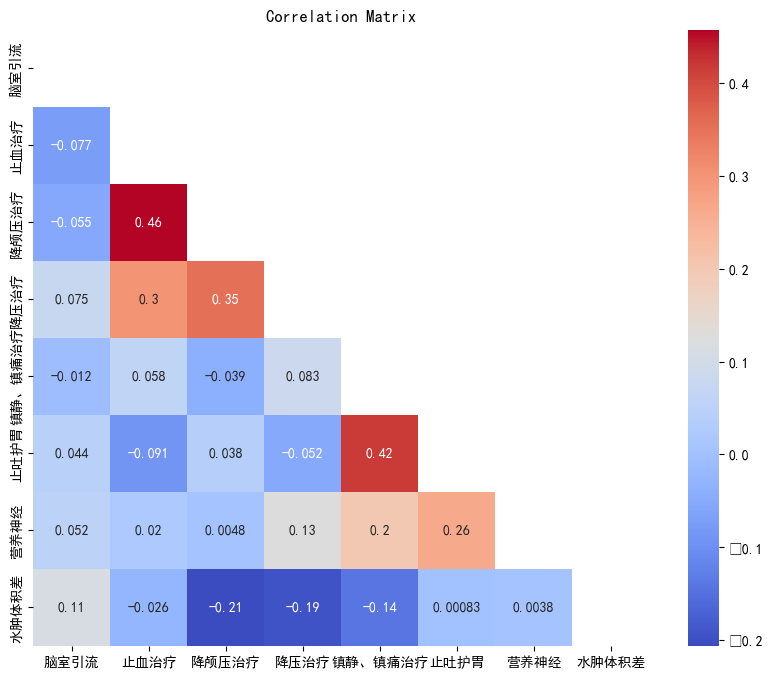

In [96]:
# 计算相关系数矩阵
corr_matrix = table_1_issue2.corr()
# 创建遮盖矩阵
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
# 绘制相关系数矩阵的热力图
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True, mask=mask)
plt.title('Correlation Matrix')
plt.show()

### d. 血肿治疗手段

In [110]:
table_2_issue2 = table_2_issue1.iloc[:100, 1::2]
table_2_issue2['血肿体积差'] = table_2_issue2.apply(calculate_difference, axis=1)
table_issue2 = pd.concat([table_1.iloc[:100, -10:-3], table_2_issue2['血肿体积差'], Y_train['水肿体积差']], axis=1)
table_issue2

,脑室引流,止血治疗,降颅压治疗,降压治疗,镇静、镇痛治疗,止吐护胃,营养神经,血肿体积差,水肿体积差
0,0,1,1,1,1,1,1,25685.0,-77639.0
1,0,1,1,1,0,1,1,47480.0,23526.0
2,0,1,1,1,1,1,1,-16867.0,-17146.0
3,0,1,1,1,0,0,0,37057.0,16987.0
4,0,1,1,0,0,1,1,-10645.0,34494.0
...,...,...,...,...,...,...,...,...,...
95,0,0,0,1,1,1,1,8548.0,5951.0
96,0,1,1,1,1,1,1,877.0,8911.0
97,0,1,1,1,1,1,1,112256.0,22580.0
98,1,1,1,1,1,1,1,-15041.0,-21280.0


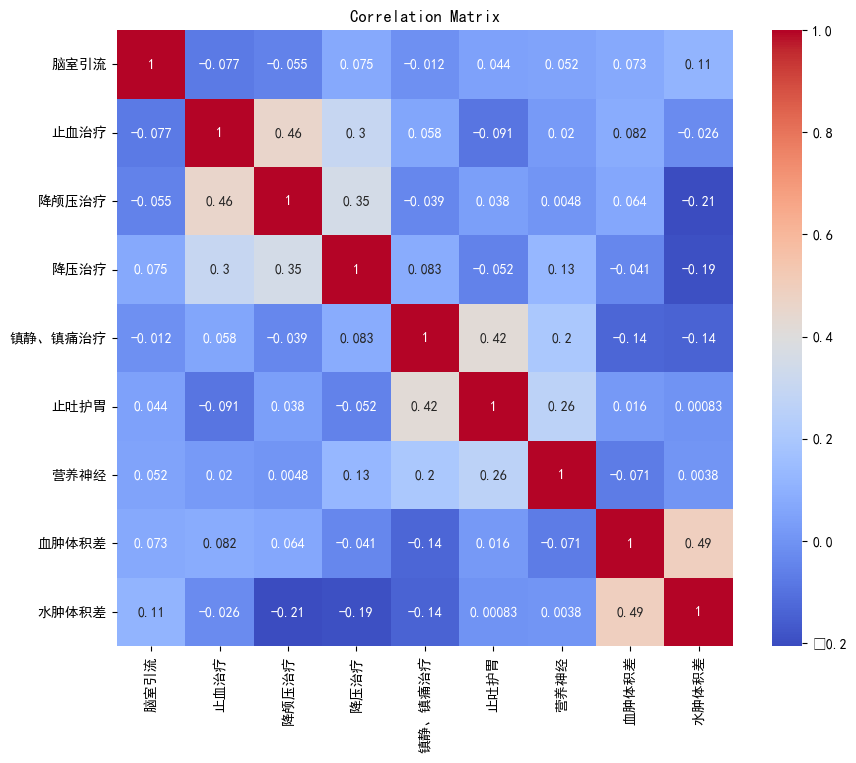

In [112]:
# 计算相关系数矩阵
corr_matrix = table_issue2.corr()

# 绘制相关系数矩阵的热力图
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

# 3. 探索脑卒中治疗的关键因素
## a. 根据患者信息，搭建90天的mRS预测模型
相关信息：
- 卒中病史
- 止吐护胃
- 营养神经
  

In [99]:
train_data

,性别,脑出血前mRS评分,高血压病史,卒中病史,糖尿病史,房颤史,冠心病史,吸烟史,饮酒史,发病到首次影像检查时间间隔,脑室引流,止血治疗,降颅压治疗,降压治疗,镇静、镇痛治疗,止吐护胃,营养神经,高压,低压,result
0,1,0,0,0,0,0,0,0,0,2.5,0,1,1,1,1,1,1,180,90,0
1,0,0,1,0,0,0,0,0,0,3.0,0,1,1,1,0,1,1,199,120,0
2,0,0,1,0,0,0,0,0,0,2.0,0,1,1,1,1,1,1,199,120,1
3,0,2,1,1,0,0,0,0,0,1.0,0,1,1,1,0,0,0,186,99,0
4,0,0,0,0,0,0,0,0,0,5.0,0,1,1,0,0,1,1,135,92,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,0,0,0,0,0,0,0,0,1.0,0,0,0,1,1,1,1,181,76,0
96,1,0,1,0,0,0,0,0,0,3.0,0,1,1,1,1,1,1,170,79,0
97,0,0,1,1,1,1,1,1,0,2.5,0,1,1,1,1,1,1,200,100,1
98,0,0,1,0,0,0,0,0,0,3.0,1,1,1,1,1,1,1,159,91,1


In [100]:
table_1.shape

(160, 22)

In [101]:
table_11 = pd.concat([table_1.iloc[:, 1:-3], table1['90天mRS']], axis=1)

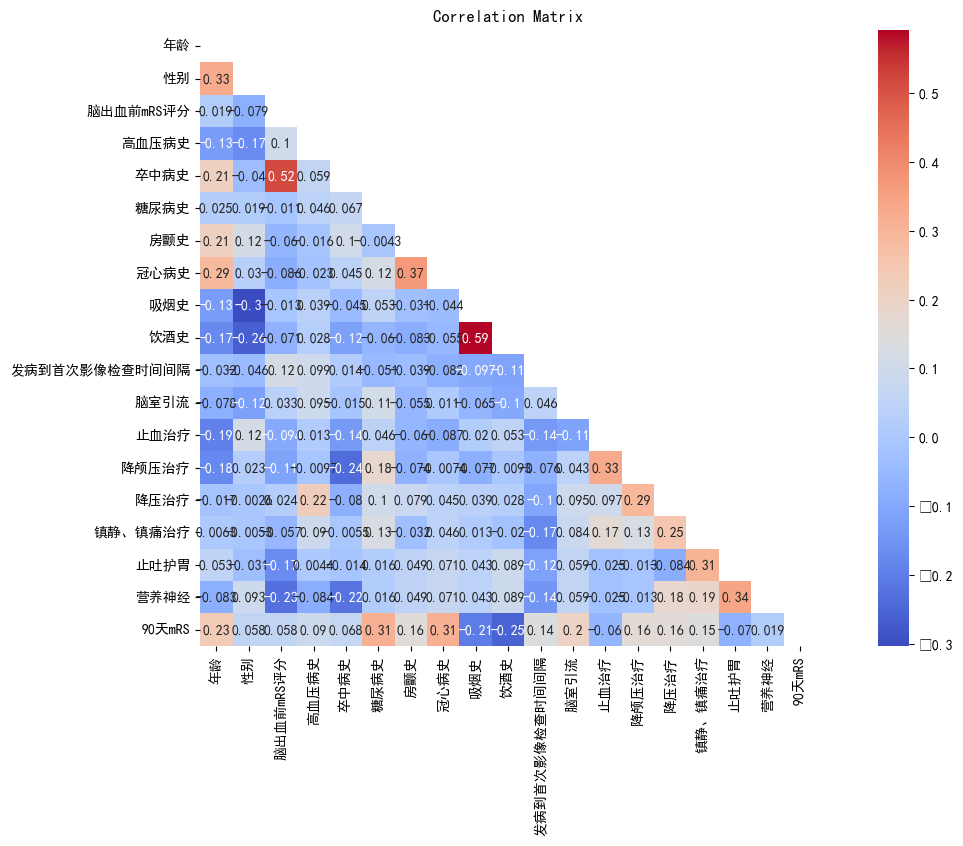

In [113]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 创建数据
data = table_11.iloc[:, :]

# 计算相关系数矩阵
corr_matrix = data.corr()

# 创建遮盖矩阵
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# 绘制相关矩阵
plt.figure(figsize=(16, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True, mask=mask)
plt.title('Correlation Matrix')
plt.show()

In [103]:
# 读表1的数据
table_1_issue3 = table_11[['年龄', '糖尿病史', '冠心病史', '吸烟史', '饮酒史', '脑室引流', '90天mRS']].iloc[:, :]
table_1_issue3

,年龄,糖尿病史,冠心病史,吸烟史,饮酒史,脑室引流,90天mRS
0,43,0,0,0,0,0,4.0
1,58,0,0,0,0,0,0.0
2,78,0,0,0,0,0,5.0
3,70,0,0,0,0,0,4.0
4,51,0,0,0,0,0,3.0
...,...,...,...,...,...,...,...
155,87,0,1,0,0,0,NaN
156,52,0,0,1,0,1,NaN
157,57,0,0,0,0,0,NaN
158,47,0,0,1,1,0,NaN


In [114]:
table_22 = pd.concat([table_2.iloc[:, 2:24], table_1_issue3['90天mRS']], axis=1)
table_22

,HM_volume,HM_ACA_R_Ratio,HM_MCA_R_Ratio,HM_PCA_R_Ratio,HM_Pons_Medulla_R_Ratio,HM_Cerebellum_R_Ratio,HM_ACA_L_Ratio,HM_MCA_L_Ratio,HM_PCA_L_Ratio,HM_Pons_Medulla_L_Ratio,...,ED_MCA_R_Ratio,ED_PCA_R_Ratio,ED_Pons_Medulla_R_Ratio,ED_Cerebellum_R_Ratio,ED_ACA_L_Ratio,ED_MCA_L_Ratio,ED_PCA_L_Ratio,ED_Pons_Medulla_L_Ratio,ED_Cerebellum_L_Ratio,90天mRS
0,69714,0.000258,0.877112,0.120148,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.726241,0.136511,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,4.0
1,47500,0.496000,0.180779,0.302316,0.000000,0.0,0.003032,0.000000,0.003705,0.000000,...,0.544249,0.246876,0.000000,0.0,0.000000,0.000000,0.002083,0.000000,0.0,0.0
2,86396,0.053718,0.829078,0.099681,0.000197,0.0,0.000000,0.000000,0.000000,0.000000,...,0.748352,0.075013,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,5.0
3,45498,0.002242,0.002198,0.029100,0.000374,0.0,0.163458,0.313618,0.385753,0.000110,...,0.002298,0.012483,0.000000,0.0,0.444685,0.433689,0.081880,0.000000,0.0,4.0
4,14832,0.000000,0.000000,0.001146,0.000337,0.0,0.000202,0.413363,0.549892,0.022047,...,0.418341,0.011690,0.003735,0.0,0.080288,0.341260,0.078093,0.001435,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,32559,0.000000,0.033754,0.000000,0.000000,0.0,0.038545,0.922049,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.370986,0.629014,0.000000,0.000000,0.0,NaN
156,18150,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.997410,0.002590,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0,NaN
157,27969,0.002682,0.937359,0.059959,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.808725,0.160686,0.003622,0.0,0.000000,0.000000,0.000000,0.000000,0.0,NaN
158,53154,0.000000,0.000000,0.000000,0.000000,0.0,0.004572,0.857678,0.131429,0.004346,...,0.000000,0.000000,0.000000,0.0,0.147678,0.711019,0.124740,0.008247,0.0,NaN


c:\Users\MrFeng\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\utils.py:80: UserWarning:

Glyph 8722 (\N{MINUS SIGN}) missing from current font.

c:\Users\MrFeng\AppData\Local\Programs\Python\Python37\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning:

Glyph 8722 (\N{MINUS SIGN}) missing from current font.



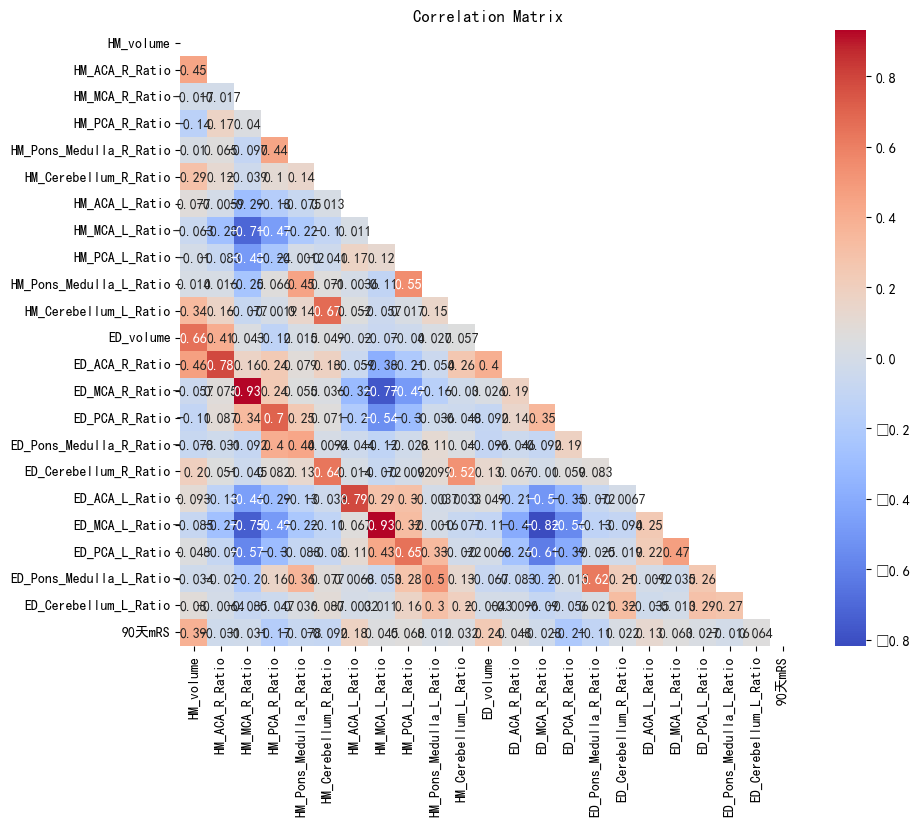

In [115]:

# 计算相关系数矩阵
corr_matrix = table_22.corr()
# 创建遮盖矩阵
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
# 绘制相关系数矩阵的热力图
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True, mask=mask)
plt.title('Correlation Matrix')
plt.show()

In [116]:
# 读表1的数据
table_2_issue3 = table_22[['HM_volume', 'ED_volume']]
table_2_issue3

,HM_volume,ED_volume
0,69714,48919
1,47500,23526
2,86396,32621
3,45498,22191
4,14832,47392
...,...,...
155,32559,8968
156,18150,409
157,27969,17948
158,53154,14430


c:\Users\MrFeng\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\utils.py:80: UserWarning:

Glyph 8722 (\N{MINUS SIGN}) missing from current font.

c:\Users\MrFeng\AppData\Local\Programs\Python\Python37\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning:

Glyph 8722 (\N{MINUS SIGN}) missing from current font.



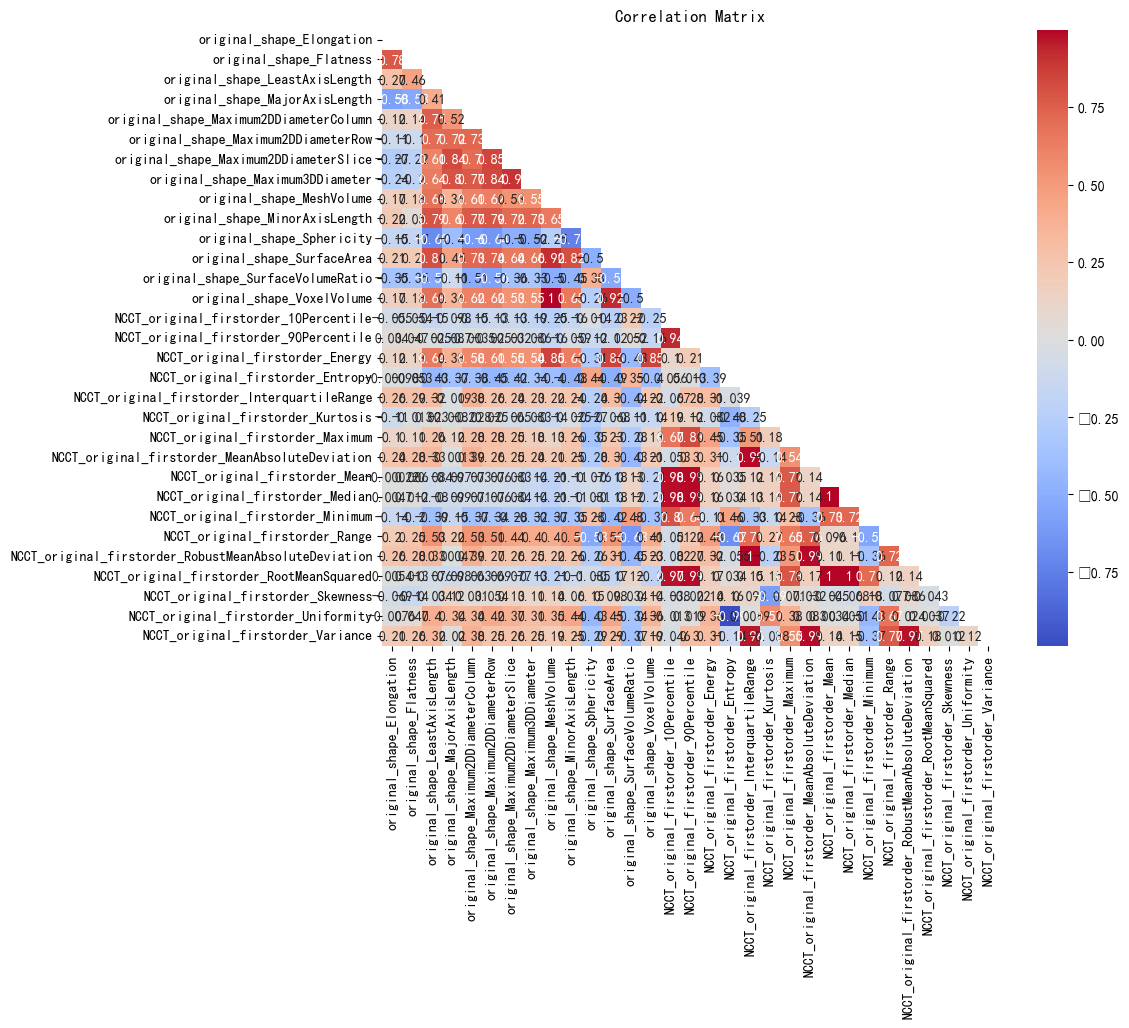

In [117]:
# 计算相关系数矩阵
corr_matrix = table_3.iloc[:160, 2:].corr()
# 创建遮盖矩阵
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
# 绘制相关系数矩阵的热力图
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True, mask=mask)
plt.title('Correlation Matrix')
plt.show()

In [118]:
table_3_issue3 = table_3[['NCCT_original_firstorder_90Percentile', 'NCCT_original_firstorder_InterquartileRange', 'NCCT_original_firstorder_MeanAbsoluteDeviation', 'NCCT_original_firstorder_Range', 'NCCT_original_firstorder_RobustMeanAbsoluteDeviation']].iloc[:160, :]
table_3_issue3.shape

(160, 5)

In [120]:
table_issue3 = pd.concat([table_3_issue3, table_2_issue3, table_1_issue3], axis=1)
table_issue3.head()

,NCCT_original_firstorder_90Percentile,NCCT_original_firstorder_InterquartileRange,NCCT_original_firstorder_MeanAbsoluteDeviation,NCCT_original_firstorder_Range,NCCT_original_firstorder_RobustMeanAbsoluteDeviation,HM_volume,ED_volume,年龄,糖尿病史,冠心病史,吸烟史,饮酒史,脑室引流,90天mRS
0,72.906089,15.880399,8.804495,68.636402,6.426142,69714,48919,43,0,0,0,0,0,4.0
1,73.853953,11.864702,7.011415,70.502845,4.876413,47500,23526,58,0,0,0,0,0,0.0
2,77.104352,14.367438,8.909079,86.779325,5.970173,86396,32621,78,0,0,0,0,0,5.0
3,65.084927,18.680634,10.581386,82.476919,7.699185,45498,22191,70,0,0,0,0,0,4.0
4,62.218976,15.335609,8.845794,61.928524,6.387522,14832,47392,51,0,0,0,0,0,3.0


In [121]:
train_data3, test_data3 = table_issue3.iloc[:100, :-1], table_issue3.iloc[100:, :-1]
train_label3, test_label3 = table_issue3.iloc[:100, -1:], table_issue3.iloc[100:, -1:]
train_data3.shape, test_data3.shape, train_label3.shape, test_label3.shape

((100, 13), (60, 13), (100, 1), (60, 1))

In [146]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 创建逻辑回归模型对象
logreg = LogisticRegression(multi_class='ovr')

# 训练逻辑回归模型
logreg.fit(train_data3, train_label3)

# 在测试集上进行预测
logreg_pred = logreg.predict(train_data3)

# 计算逻辑回归模型的精度
logreg_accuracy = accuracy_score(train_label3.iloc[:, 0], logreg_pred)
print("逻辑回归模型精度：", logreg_accuracy)

c:\Users\MrFeng\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



逻辑回归模型精度： 0.38


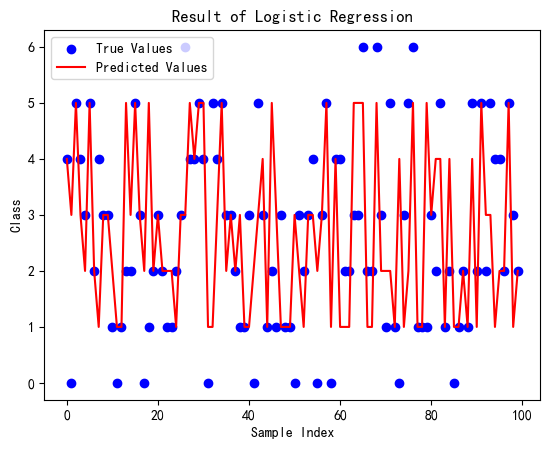

In [147]:
import matplotlib.pyplot as plt
import numpy as np

# 绘制真实值的散点图
plt.scatter(range(len(train_label3)), train_label3.iloc[:, 0], color='blue', label='True Values')

# 绘制逻辑回归模型的预测曲线
plt.plot(range(len(logreg_pred)), logreg_pred, color='red', label='Predicted Values')

# 添加图例和标签
plt.legend()
plt.xlabel('Sample Index')
plt.ylabel('Class')
plt.title('Result of Logistic Regression')

# 显示图形
plt.show()

In [145]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 创建随机森林模型
rf = RandomForestClassifier(n_estimators=8)

# 训练随机森林模型
rf.fit(train_data3, train_label3)

# 在测试集上进行预测
rf_pred = rf.predict(train_data3)
# 计算随机森林模型的精度
rf_accuracy = accuracy_score(train_label3.iloc[:, 0], rf_pred)
print("随机森林模型精度：", rf_accuracy)

随机森林模型精度： 0.98


c:\Users\MrFeng\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



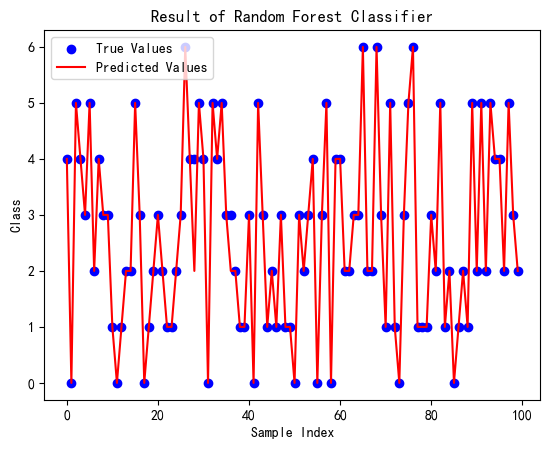

In [142]:
import matplotlib.pyplot as plt
import numpy as np

# 绘制真实值的散点图
plt.scatter(range(len(train_label3)), train_label3.iloc[:, 0], color='blue', label='True Values')

# 绘制随机森林模型的预测曲线
plt.plot(range(len(rf_pred)), rf_pred, color='red', label='Predicted Values')

# 添加图例和标签
plt.legend()
plt.xlabel('Sample Index')
plt.ylabel('Class')
plt.title('Result of Random Forest Classifier')

# 显示图形
plt.show()

In [143]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 创建K临近算法模型对象
knn = KNeighborsClassifier(n_neighbors=2)

# 训练K临近算法模型
knn.fit(train_data3, train_label3)

# 在测试集上进行预测
knn_pred = knn.predict(train_data3)

# 计算K临近算法模型的精度
knn_accuracy = sum(train_label3.iloc[:, 0] == knn_pred) / len(knn_pred)
print(f"K临近算法模型精度：", knn_accuracy)

K临近算法模型精度： 0.55


c:\Users\MrFeng\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



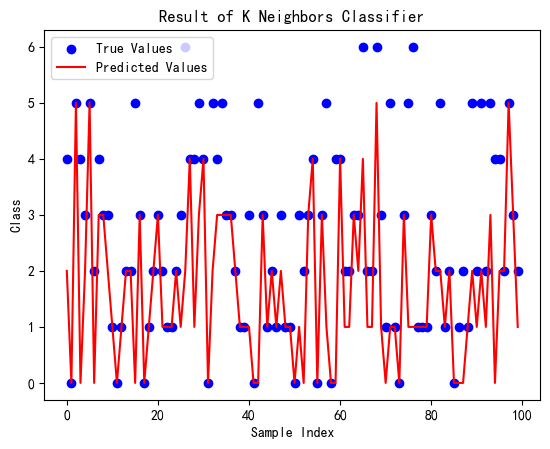

In [144]:
import matplotlib.pyplot as plt
import numpy as np

# 绘制真实值的散点图
plt.scatter(range(len(train_label3)), train_label3.iloc[:, 0], color='blue', label='True Values')

# 绘制K临近算法模型的预测曲线
plt.plot(range(len(knn_pred)), knn_pred, color='red', label='Predicted Values')

# 添加图例和标签
plt.legend()
plt.xlabel('Sample Index')
plt.ylabel('Class')
plt.title('Result of K Neighbors Classifier')

# 显示图形
plt.show()

In [125]:
mRS_list = rf.predict(table_issue3.iloc[:, :-1])
mRS_list

array([4., 0., 5., 4., 3., 5., 2., 4., 3., 3., 1., 0., 1., 2., 2., 5., 3.,
       0., 1., 2., 3., 2., 1., 1., 2., 3., 6., 4., 2., 5., 4., 0., 5., 4.,
       5., 3., 2., 2., 1., 1., 3., 0., 5., 3., 1., 2., 1., 3., 1., 1., 0.,
       3., 2., 3., 4., 0., 3., 5., 0., 4., 4., 2., 2., 3., 3., 6., 2., 2.,
       6., 3., 1., 5., 1., 0., 3., 5., 6., 1., 1., 1., 3., 2., 5., 1., 2.,
       0., 1., 2., 1., 5., 2., 5., 2., 5., 4., 4., 2., 5., 3., 2., 2., 1.,
       1., 4., 1., 2., 2., 1., 3., 3., 2., 0., 3., 2., 2., 1., 3., 6., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 3., 5., 5., 4., 1., 1., 3., 3., 3.,
       2., 1., 2., 0., 4., 0., 0., 1., 1., 1., 5., 1., 4., 1., 6., 3., 5.,
       4., 4., 2., 0., 3., 4., 5.])

In [126]:
from openpyxl import load_workbook

# 打开答案文件.xlsx
workbook = load_workbook('../E题/数据/表4-答案文件.xlsx')

# 选择活动的工作表
worksheet = workbook.active

# 获取起始单元格的列号和行号
prob_start_column = 'I'
start_row = 4

# 逐行写入result列表的元素
for i in range(len(mRS_list)):
    # 定位
    prob_current_column = prob_start_column
    prob_cell_coordinate = f"{prob_current_column}{start_row + i}"
    # 写入
    worksheet[prob_cell_coordinate] = mRS_list[i]


# 保存工作簿到文件
workbook.save('../E题/数据/表4-答案文件.xlsx')

## 3.b 根据所有信息，预测mRS的值

In [127]:
table = pd.concat([table_1.iloc[:100, :], table_2.iloc[:100, 1:], table_3.iloc[:100, :]], axis=1)
table.shape

(100, 262)

In [128]:
table = table.fillna(table.mean())

In [129]:
# 数据清洗
# 使用均值进行缺失值填充
table.fillna(table.mean(), inplace=True)
# 使用Z-score方法检测和处理异常值
from scipy import stats
z_scores = stats.zscore(table)
df = table[(z_scores < 3).all(axis=1)]

null_counts = df.isnull().sum()
print(null_counts)

入院首次影像检查流水号                                             0.0
年龄                                                      0.0
性别                                                      0.0
脑出血前mRS评分                                               0.0
高血压病史                                                   0.0
                                                       ... 
NCCT_original_firstorder_RobustMeanAbsoluteDeviation    0.0
NCCT_original_firstorder_RootMeanSquared                0.0
NCCT_original_firstorder_Skewness                       0.0
NCCT_original_firstorder_Uniformity                     0.0
NCCT_original_firstorder_Variance                       0.0
Length: 262, dtype: float64


In [130]:
print(table.dtypes)

入院首次影像检查流水号                                               int64
年龄                                                        int64
性别                                                        int64
脑出血前mRS评分                                                 int64
高血压病史                                                     int64
                                                         ...   
NCCT_original_firstorder_RobustMeanAbsoluteDeviation    float64
NCCT_original_firstorder_RootMeanSquared                float64
NCCT_original_firstorder_Skewness                       float64
NCCT_original_firstorder_Uniformity                     float64
NCCT_original_firstorder_Variance                       float64
Length: 262, dtype: object


In [131]:
table_1.head()

,入院首次影像检查流水号,年龄,性别,脑出血前mRS评分,高血压病史,卒中病史,糖尿病史,房颤史,冠心病史,吸烟史,...,脑室引流,止血治疗,降颅压治疗,降压治疗,镇静、镇痛治疗,止吐护胃,营养神经,高压,低压,result
0,20161212002136,43,1,0,0,0,0,0,0,0,...,0,1,1,1,1,1,1,180,90,0
1,20160406002131,58,0,0,1,0,0,0,0,0,...,0,1,1,1,0,1,1,199,120,0
2,20160413000006,78,0,0,1,0,0,0,0,0,...,0,1,1,1,1,1,1,199,120,1
3,20161215001667,70,0,2,1,1,0,0,0,0,...,0,1,1,1,0,0,0,186,99,0
4,20161222000978,51,0,0,0,0,0,0,0,0,...,0,1,1,0,0,1,1,135,92,1


c:\Users\MrFeng\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\utils.py:80: UserWarning:

Glyph 8722 (\N{MINUS SIGN}) missing from current font.

c:\Users\MrFeng\AppData\Local\Programs\Python\Python37\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning:

Glyph 8722 (\N{MINUS SIGN}) missing from current font.



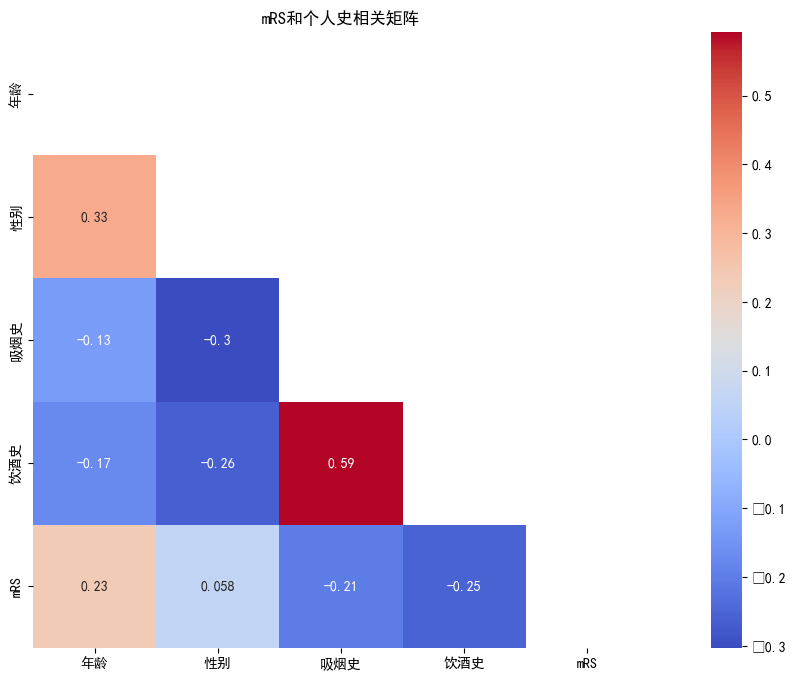

In [132]:
# 创建数据
data = table_1[['年龄', '性别', '吸烟史', '饮酒史']].assign(mRS=train_label3)  # 假设train_data的标签位于第一列

# 计算相关系数矩阵
corr_matrix = data.corr()

# 创建遮盖矩阵
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# 绘制相关矩阵
plt.figure(figsize=(16, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True, mask=mask)
plt.title('mRS和个人史相关矩阵')
plt.show()

In [133]:
table_1 = table_1.drop(columns=['吸烟史', '饮酒史'])

In [134]:
table_1

,入院首次影像检查流水号,年龄,性别,脑出血前mRS评分,高血压病史,卒中病史,糖尿病史,房颤史,冠心病史,发病到首次影像检查时间间隔,脑室引流,止血治疗,降颅压治疗,降压治疗,镇静、镇痛治疗,止吐护胃,营养神经,高压,低压,result
0,20161212002136,43,1,0,0,0,0,0,0,2.5,0,1,1,1,1,1,1,180,90,0
1,20160406002131,58,0,0,1,0,0,0,0,3.0,0,1,1,1,0,1,1,199,120,0
2,20160413000006,78,0,0,1,0,0,0,0,2.0,0,1,1,1,1,1,1,199,120,1
3,20161215001667,70,0,2,1,1,0,0,0,1.0,0,1,1,1,0,0,0,186,99,0
4,20161222000978,51,0,0,0,0,0,0,0,5.0,0,1,1,0,0,1,1,135,92,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,20200306000927,87,1,0,1,0,0,0,1,5.5,0,1,1,1,0,1,1,202,100,0
156,20201009003102,52,0,2,1,1,0,0,0,0.5,1,0,1,1,1,1,1,180,110,1
157,20200410001952,57,0,0,1,0,0,0,0,2.8,0,1,1,1,1,1,1,233,135,0
158,20200218000582,47,0,0,1,0,0,0,0,3.0,0,1,1,1,1,1,1,183,122,1


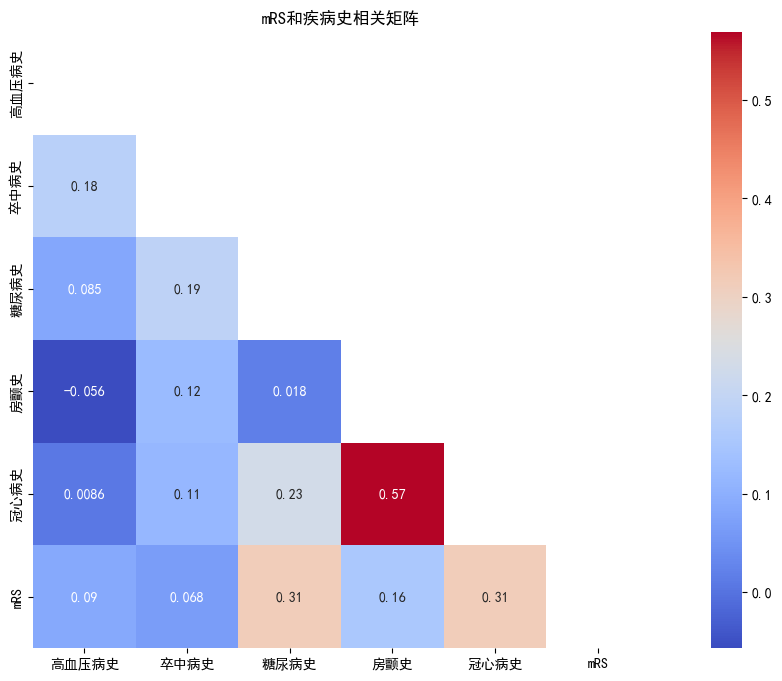

In [135]:
# 创建数据
data = table_1.iloc[:100, 4:9].assign(mRS=train_label3)  # 假设train_data的标签位于第一列

# 计算相关系数矩阵
corr_matrix = data.corr()

# 创建遮盖矩阵
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# 绘制相关矩阵
plt.figure(figsize=(16, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True, mask=mask)
plt.title('mRS和疾病史相关矩阵')
plt.show()

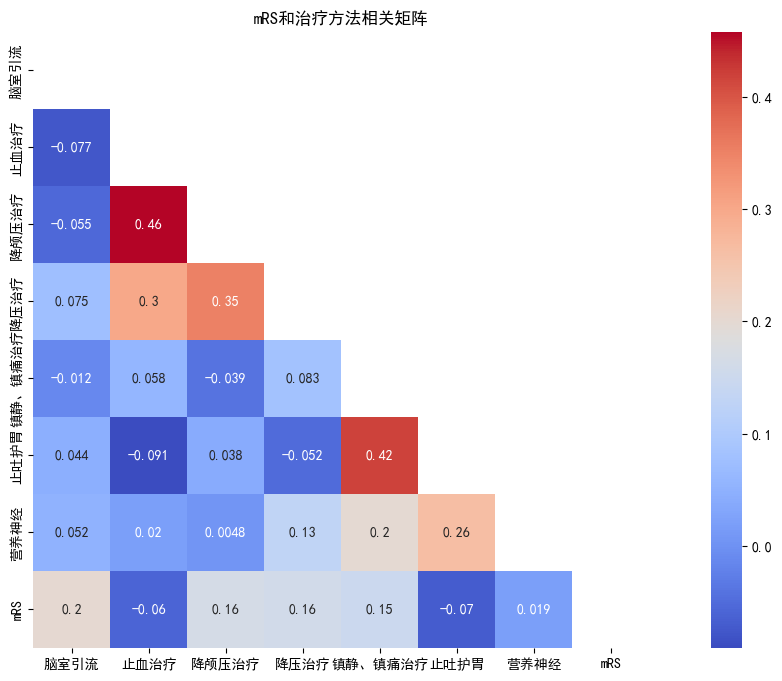

In [136]:
# 创建数据
data = table_1.iloc[:100, 10:-3].assign(mRS=train_label3)  # 假设train_data的标签位于第一列

# 计算相关系数矩阵
corr_matrix = data.corr()

# 创建遮盖矩阵
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# 绘制相关矩阵
plt.figure(figsize=(16, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True, mask=mask)
plt.title('mRS和治疗方法相关矩阵')
plt.show()

In [137]:
table_2

,ID,首次检查流水号,HM_volume,HM_ACA_R_Ratio,HM_MCA_R_Ratio,HM_PCA_R_Ratio,HM_Pons_Medulla_R_Ratio,HM_Cerebellum_R_Ratio,HM_ACA_L_Ratio,HM_MCA_L_Ratio,...,ED_ACA_R_Ratio.8,ED_MCA_R_Ratio.8,ED_PCA_R_Ratio.8,ED_Pons_Medulla_R_Ratio.8,ED_Cerebellum_R_Ratio.8,ED_ACA_L_Ratio.8,ED_MCA_L_Ratio.8,ED_PCA_L_Ratio.8,ED_Pons_Medulla_L_Ratio.8,ED_Cerebellum_L_Ratio.8
0,sub001,20161212002136,69714,0.000258,0.877112,0.120148,0.000000,0.0,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,sub002,20160406002131,47500,0.496000,0.180779,0.302316,0.000000,0.0,0.003032,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,sub003,20160413000006,86396,0.053718,0.829078,0.099681,0.000197,0.0,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,sub004,20161215001667,45498,0.002242,0.002198,0.029100,0.000374,0.0,0.163458,0.313618,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,sub005,20161222000978,14832,0.000000,0.000000,0.001146,0.000337,0.0,0.000202,0.413363,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,sub156,20200306000927,32559,0.000000,0.033754,0.000000,0.000000,0.0,0.038545,0.922049,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
156,sub157,20201009003102,18150,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.997410,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157,sub158,20200410001952,27969,0.002682,0.937359,0.059959,0.000000,0.0,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
158,sub159,20200218000582,53154,0.000000,0.000000,0.000000,0.000000,0.0,0.004572,0.857678,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
